In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [4]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_overlapped/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_overlapped/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_overlapped/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_overlapped/exp/"

# df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
# df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
# df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs_test.pkl")
# exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [5]:
epgExpInb = copy(exp_1g_corr)
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = copy(df_3987_corr)
bkgSimInb = copy(df_4076_1g_corr)
pi0SimInb = copy(df_4076_2g_corr)

In [6]:
epgExpInbCDFT = epgExpInb.loc[exp_1g_corr.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[(exp_2g_corr.Ge2>0.8)&((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector>7)]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector>7)]

In [7]:
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[(exp_2g_corr.Ge2>0.8)&((pi0ExpInb.Psector>7)&(pi0ExpInb.Ptheta<60))& (pi0ExpInb.Gsector<7)]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector<7)]

In [8]:
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[(exp_2g_corr.Ge2>0.8)&(pi0ExpInb.Psector<7)& (pi0ExpInb.Gsector<7)]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0SimInbFD = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&(pi0SimInb.Psector<7)& (pi0SimInb.Gsector<7)]

In [9]:
pi0ExpInb = pd.concat([pi0ExpInbFD, pi0ExpInbCD, pi0ExpInbCDFT])
pi0SimInb = pd.concat([pi0SimInbFD, pi0SimInbCD, pi0SimInbCDFT])

In [10]:
contCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)

In [11]:
print(contCD, contFD, contCDFT)

0.10647430897880471 0.32112579052196055 0.0030302029157795955


coneAngle 23.785410424036794
reconGam 0.3532822200390873
coplanarity 2.457165010594872
ME_epg 0.07168408573272168
MM2_epg -0.0010880281954393095
MM2_eg 0.8423174976199668
MM2_ep -0.008828290693443342
MPt 0.05843267603079847


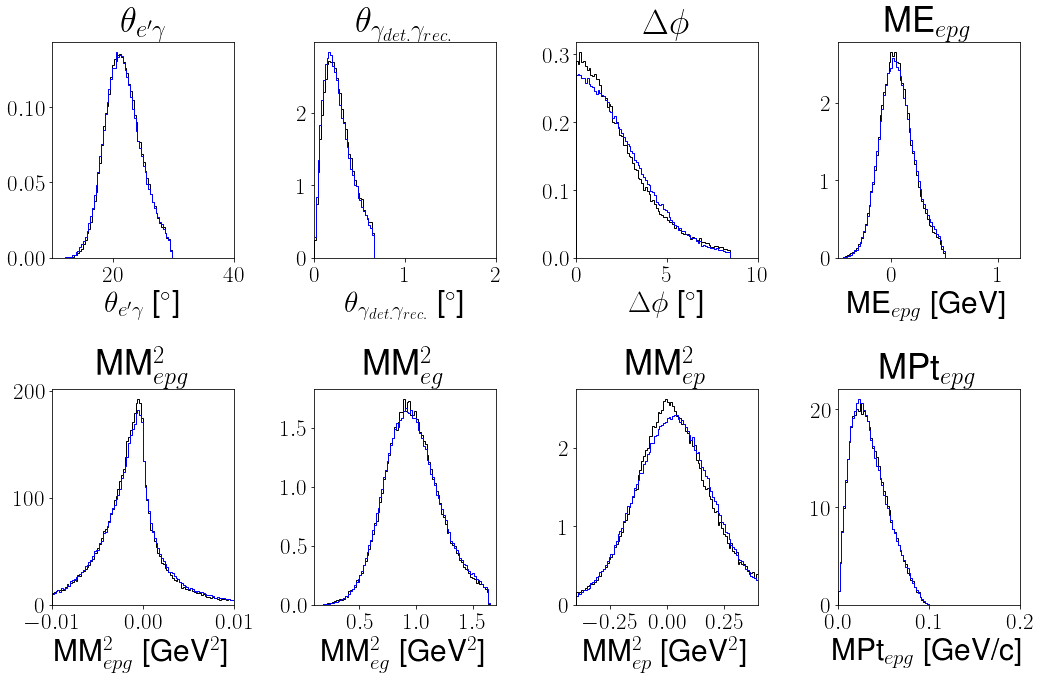

<Figure size 432x288 with 0 Axes>

In [13]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = simDist_dvcs#(1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

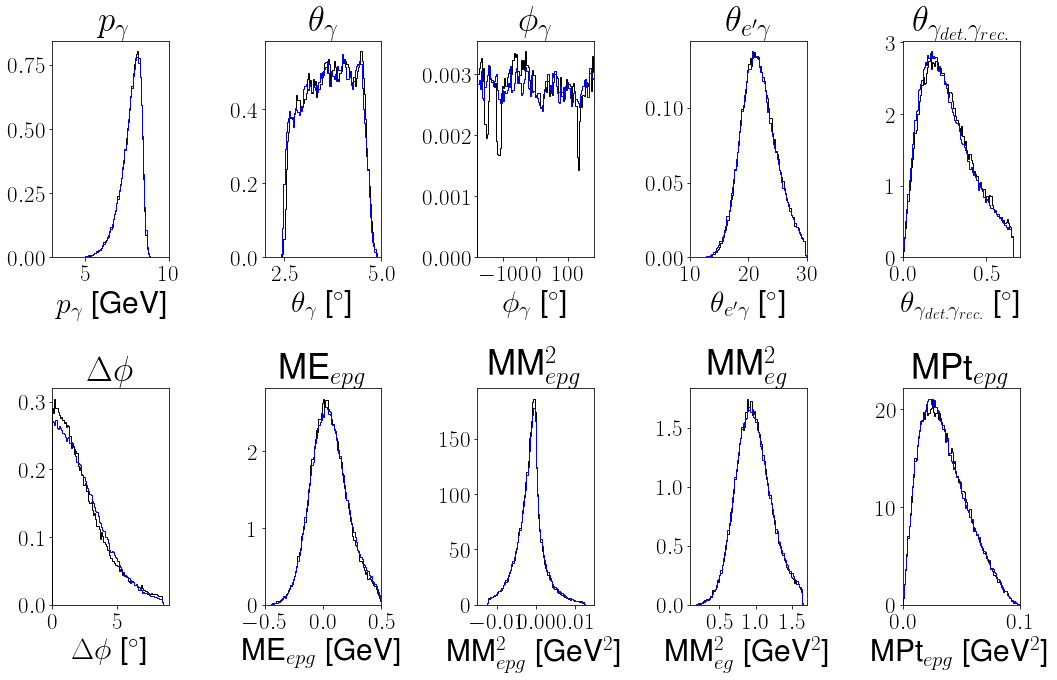

<Figure size 432x288 with 0 Axes>

In [13]:
#photon related
varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MPt"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [3, 2, -180, 10, 0, 0, -0.5, -0.015, 0.1, 0]
binends = [10, 5, 180, 30, 0.7, 9, 0.5, 0.015, 1.7, 0.1]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
#         simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
#         simDist = (1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
        simDist = simDist_dvcs
#         expDist, bins = np.histogram(correctDVCS(epgExpInbCDFT, 0.25)[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
#         print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 22.93857655304077
reconGam 0.29689381661631775
coplanarity 2.1821340171030807
ME_epg 0.027348613732795183
MM2_epg -0.0010038904025621938
MM2_eg 0.8480201711854667
MM2_ep -0.0007687609336374877
MPt 0.04723972700781164


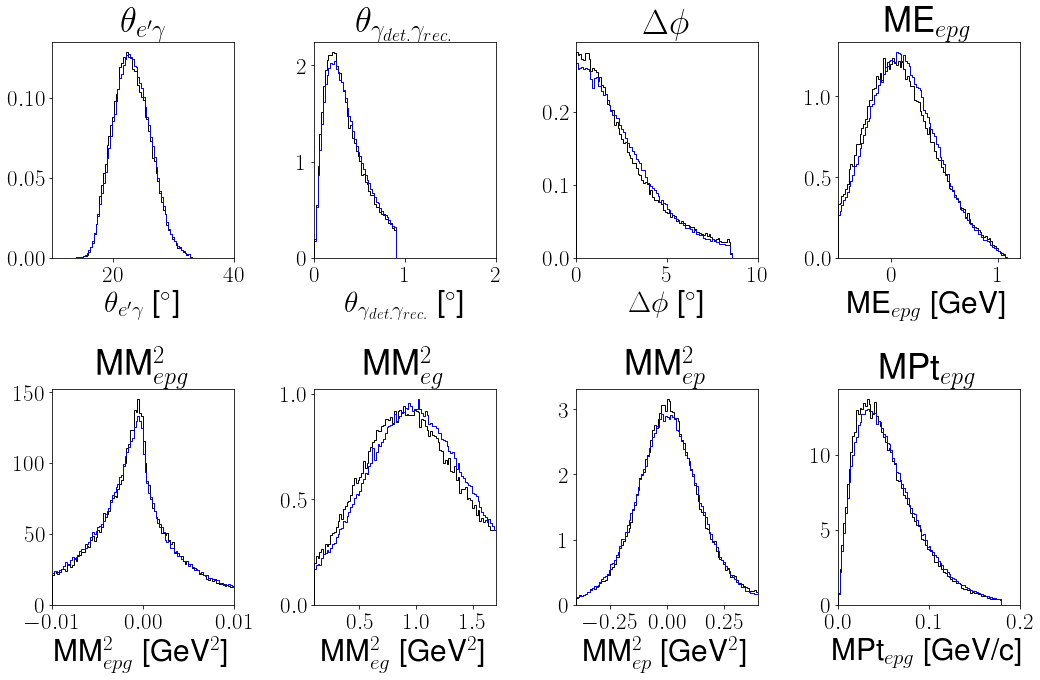

<Figure size 432x288 with 0 Axes>

In [14]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

Gp
Gtheta
Gphi
coneAngle
reconGam
t2
ME_epg
MM2_epg
MM2_eg
MPt


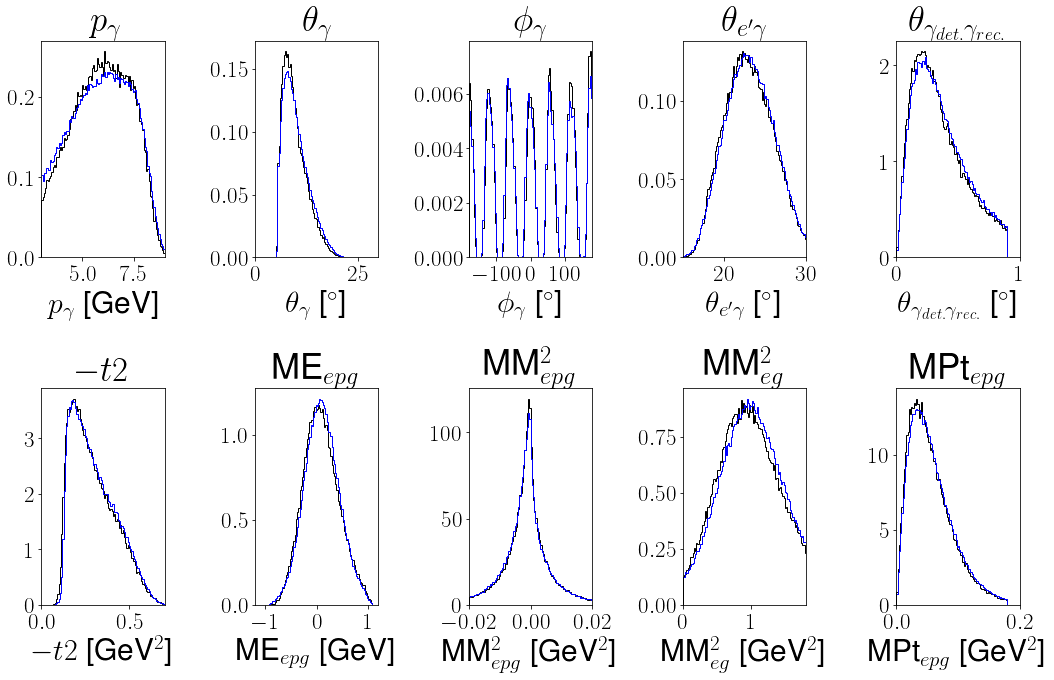

<Figure size 432x288 with 0 Axes>

In [15]:
df1 = dvcsSimInbCD
df2 = bkgSimInbCD


#photon related
varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "t2", "ME_epg", "MM2_epg", "MM2_eg", "MPt"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$-t2$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, degree, degree, GeV2, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [3, 0, -180, 15, 0, 0, -1.2, -0.02, 0, 0]
binends = [9, 30, 180, 30, 1, .7, 1.2, 0.02, 1.8, 0.2]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
#         expDist, bins = np.histogram(correctDVCS(epgExpInbCDFT, 0.25)[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(correctDVCS3(epgExpInbCD, correction)[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind])#, nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

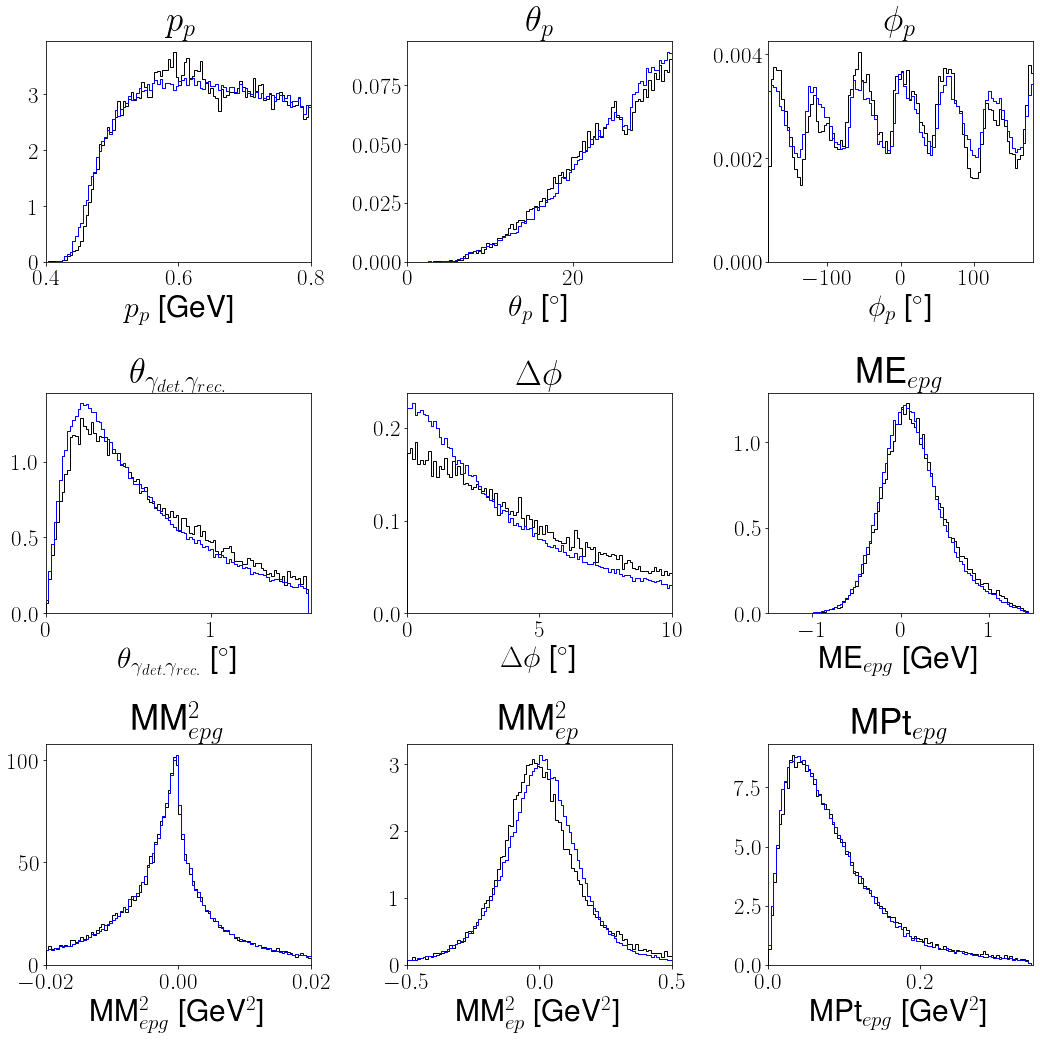

<Figure size 432x288 with 0 Axes>

In [16]:
#proton related
# df1 = smearingDVCS4(dvcsSimInbFD, np.abs(0.12*(1/(1+np.exp(-(dvcsSimInbFD.Pp-0.42)/0.05))-0.5)), 0, 0)
# df2 = smearingDVCS4(bkgSimInbFD, np.abs(0.12*(1/(1+np.exp(-(bkgSimInbFD.Pp-0.42)/0.05))-0.5)), 0, 0)
# contFD = 0.27

df1 = dvcsSimInbFD
df2 = bkgSimInbFD

varstoplot = ["Pp", "Ptheta", "Pphi",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p}$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0.4, 0, -180, 0, 0, -1.5, -0.02, -0.5, 0]
binends = [0.8, 32, 180, 1.6, 10, 1.5, 0.02, 0.5, 0.35]
fig, axs = plt.subplots(3, 3, figsize = (15,15))
for yind in range(0, 3):
    for xind in range(0, 3):
        ind = 3*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

Gp 5.368675555942733 0.16666666666666663
Gtheta 14.874655631039031 0.04
Gphi -2.345352956302605 0.0027777777777777775
coneAngle 31.311673072859822 0.04
reconGam 0.5632976372646146 0.6249999999999999
t2 0.38039402973056097 1.6666666666666663
ME_epg 0.1168255341182351 0.33333333333333337
MM2_epg -0.001811324043317619 25.0
MM2_eg 1.0108325004987564 0.2941176470588235
MPt 0.08018842686613908 2.8571428571428577


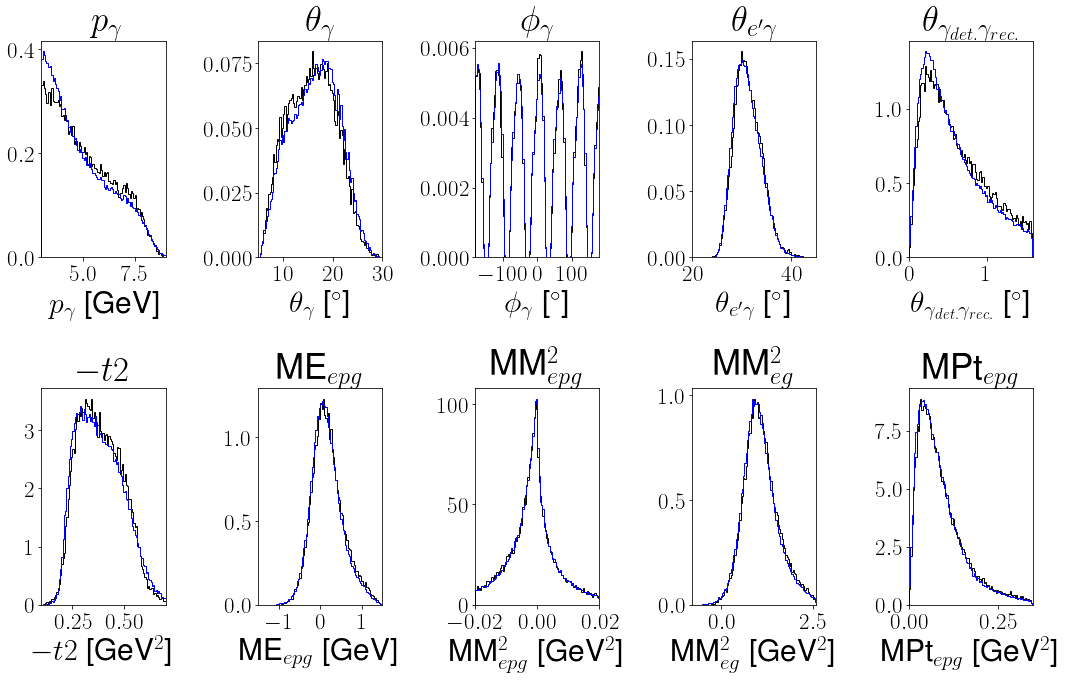

<Figure size 432x288 with 0 Axes>

In [17]:
correction = 0#0.015*(epgExpInbFD.Gp+9/epgExpInbFD.Gp)

#photon related
varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "t2", "ME_epg", "MM2_epg", "MM2_eg", "MPt"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$-t2$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, degree, degree, GeV2, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [3, 5, -180, 20, 0, 0.1, -1.5, -0.02, -0.8, 0]
binends = [9, 30, 180, 45, 1.6, 0.7, 1.5, 0.02, 2.6, 0.35]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins), simDist.mean())
#         axs[yind, xind].step(bincenters, (1-contFD)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

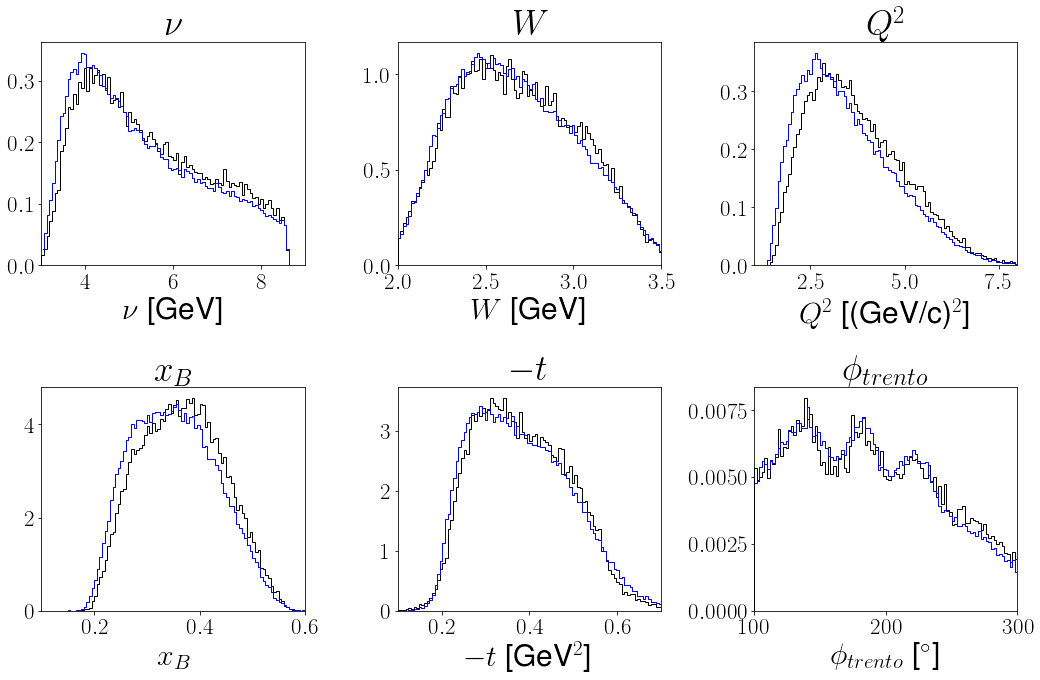

<Figure size 432x288 with 0 Axes>

In [18]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 1, 0.1, 0.1, 100]
binends = [9, 3.5, 8, 0.6, 0.7, 300]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = contFD*simDist_dvpi0 + (1-contFD)*simDist_dvcs
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, contFD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
#         print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, contFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

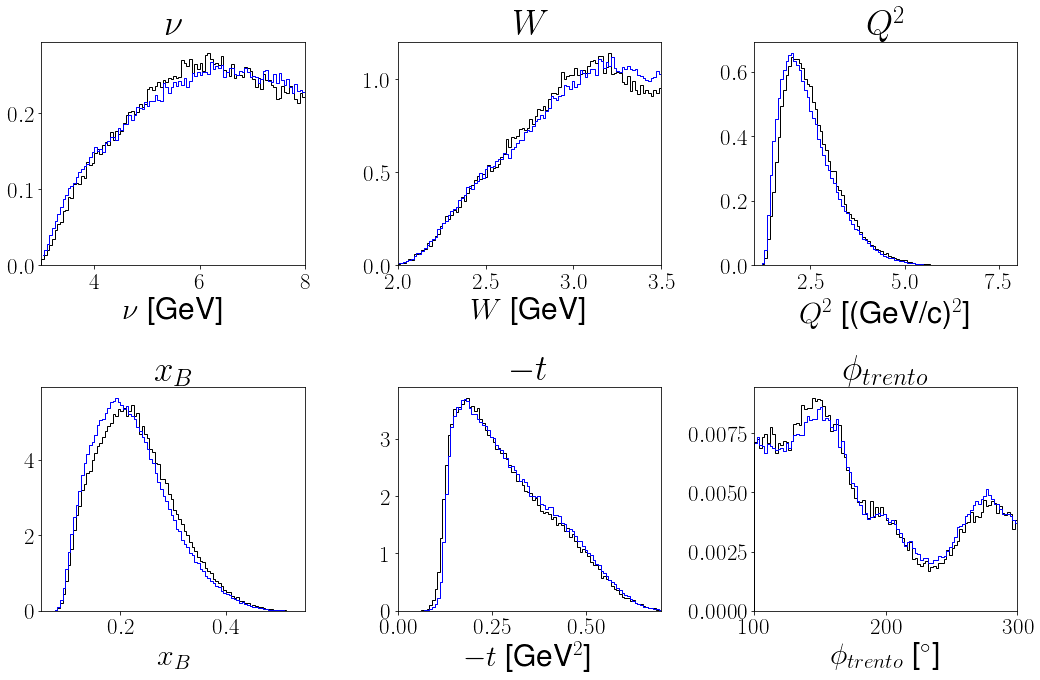

<Figure size 432x288 with 0 Axes>

In [19]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 1, 0.05, 0, 100]
binends = [8, 3.5, 8, 0.55, 0.7, 300]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = contCD*simDist_dvpi0 + (1-contCD)*simDist_dvcs
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, contFD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
#         print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, contCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

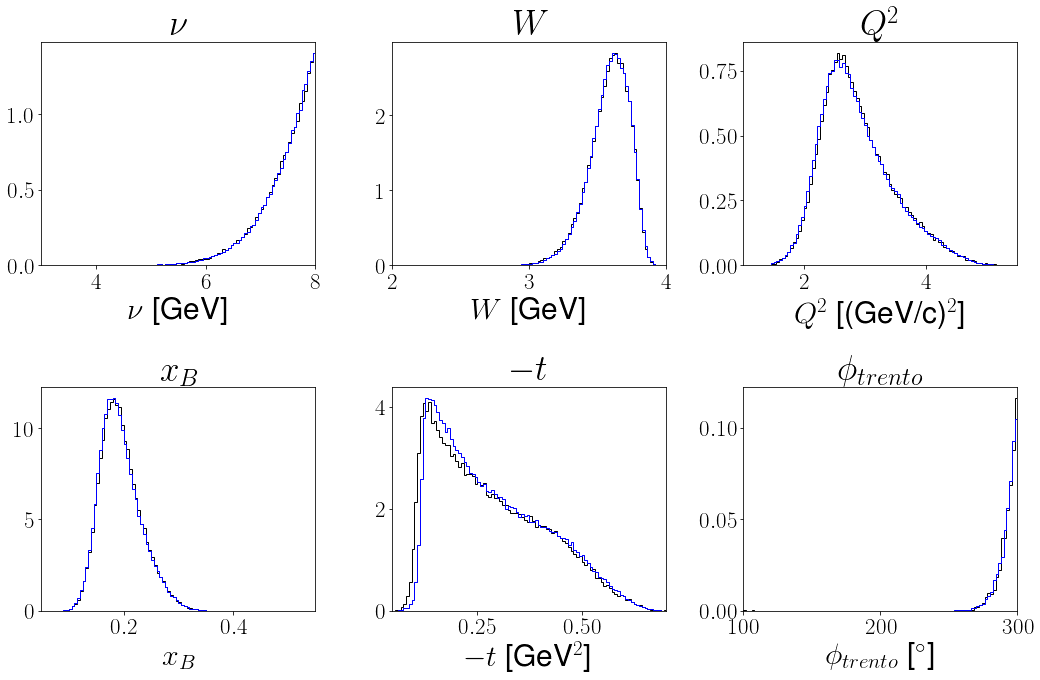

<Figure size 432x288 with 0 Axes>

In [20]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 1, 0.05, 0.05, 100]
binends = [8, 4, 5.5, 0.55, 0.7, 300]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = simDist_dvcs
        expDist, bins = np.histogram(epgExpInbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, contFD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
#         print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, contFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [21]:
pi0ExpInb = pd.concat([pi0ExpInbFD, pi0ExpInbCD, pi0ExpInbCDFT])
pi0SimInb = pd.concat([pi0SimInbFD, pi0SimInbCD, pi0SimInbCDFT])

In [22]:
cont = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)

<AxesSubplot:>

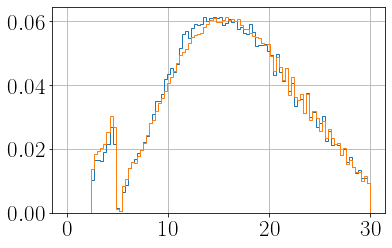

In [23]:
pi0ExpInb.Gtheta.hist(bins = np.linspace(0, 30, 101), histtype = 'step', density = True)
pi0SimInb.Gtheta.hist(bins = np.linspace(0, 30, 101), histtype = 'step', density = True)

<AxesSubplot:>

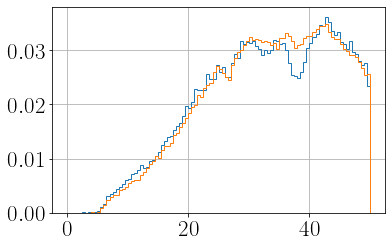

In [24]:
pi0ExpInb.Ptheta.hist(bins = np.linspace(0, 50, 101), histtype = 'step', density = True)
pi0SimInb.Ptheta.hist(bins = np.linspace(0, 50, 101), histtype = 'step', density = True)

Ep 3.2378283261954772
Pp 0.5457253411484032
Gp 7.21786069863236
Etheta 17.14263891614238
Ptheta 52.68045593033563
Gtheta 5.7138246685424505
Ephi -5.633787278110697
Pphi -4.810877660418315
Gphi 1.9905185320312815


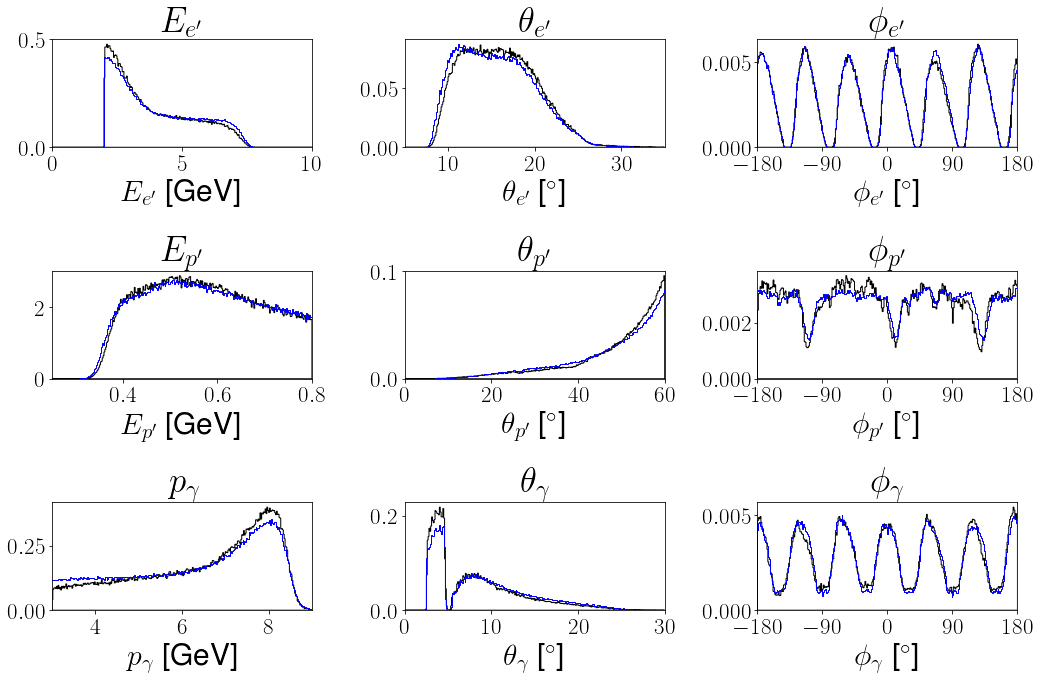

<Figure size 432x288 with 0 Axes>

In [25]:
varstoplot = ["Ep", "Etheta", "Ephi", "Pp", "Ptheta", "Pphi", "Gp", "Gtheta", "Gphi"]
title = [r"$E_{e'}$", r"$\theta_{e'}$", r"$\phi_{e'}$", r"$E_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$" ]
unit = [GeV, degree, degree, GeV, degree, degree, GeV, degree, degree]
binstarts = [0, 5, -180, 0.25, 0, -180, 3, 0, -180]
binends = [10, 35, 180, 0.8, 60, 180, 9, 30, 180]
fig, axs = plt.subplots(3, 3, figsize = (15, 10))
for xind in range(0, 3):
    for yind in range(0, 3):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 301)
        simDist_dvpi0, bins = np.histogram(bkgSimInb[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInb[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInb/len_pi0SimInb*simDist_dvpi0 + (len_epgExpInb/len_dvcsSimInb-len_bkgSimInb/len_pi0SimInb*len_pi0ExpInb/len_dvcsSimInb)*simDist_dvcs
        simDist = (1-cont)*simDist_dvcs + cont*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInb[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInb-cont_inb_/len_dvcsSimInb)*len_epgExpInb*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInb[varstoplot[ind]]+0.01, bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInb[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInb/len_pi0SimInb*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInb)/len(pi0SimInb)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
axs[0,2].set_xticks([-180, -90, 0, 90, 180])
axs[1,2].set_xticks([-180, -90, 0, 90, 180])
axs[2,2].set_xticks([-180, -90, 0, 90, 180])
plt.tight_layout()
# plt.savefig("kine.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [26]:
epgExpInb.ycol2.min()

0.5383308800276048

In [27]:
epgExpInb.y.max()

0.8113915988587169

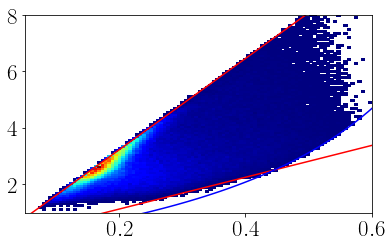

In [28]:
# plt.hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
plt.hist2d(epgExpInb.xB, epgExpInb.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1, cmap = cmap)
x1 = np.linspace(0, 1, 101)
plt.plot(x1, x1*2*M*(10.604-2), color = 'r')
x1 = np.linspace(0, 1, 101)
plt.plot(x1, x1*2*M*(3), color = 'r')
x2 = np.linspace(0, 1, 101)
# plt.plot(x2, 1+x2*0, color = 'r')
x3 = np.linspace(0,1, 101)
# plt.plot(x1, x1*M**2/(M**2*x1**2-(1-x1)*0.553), color = 'k')
x4 = np.linspace(0, 1, 101)
# plt.plot(x4, 2*10.604*M*x4/(1+M*x4/10.604/(1-np.cos(35*np.pi/180.0))), color = 'k')
x5 = np.linspace(0, 0.9, 101)
plt.plot(x5, (4 - M*M)*x5/(1 - x5), color = 'b')
# plt.xlim([0, 1])
# plt.ylim([0, 10])
plt.show()

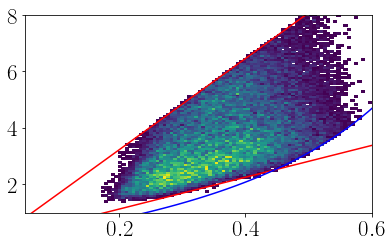

In [29]:
# plt.hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
plt.hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
x1 = np.linspace(0, 1, 101)
plt.plot(x1, x1*2*M*(10.604-2), color = 'r')
x1 = np.linspace(0, 1, 101)
plt.plot(x1, x1*2*M*(3), color = 'r')
x2 = np.linspace(0, 1, 101)
# plt.plot(x2, 1+x2*0, color = 'r')
x3 = np.linspace(0,1, 101)
# plt.plot(x1, x1*M**2/(M**2*x1**2-(1-x1)*0.553), color = 'k')
x4 = np.linspace(0, 1, 101)
# plt.plot(x4, 2*10.604*M*x4/(1+M*x4/10.604/(1-np.cos(35*np.pi/180.0))), color = 'k')
x5 = np.linspace(0, 0.9, 101)
plt.plot(x5, (4 - M*M)*x5/(1 - x5), color = 'b')
# plt.xlim([0, 1])
# plt.ylim([0, 10])
plt.show()

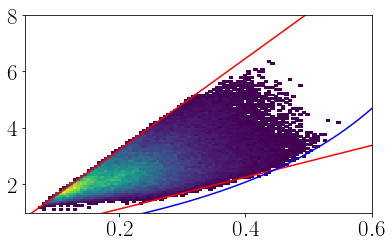

In [30]:
# plt.hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
plt.hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
x1 = np.linspace(0, 1, 101)
plt.plot(x1, x1*2*M*(10.604-2), color = 'r')
x1 = np.linspace(0, 1, 101)
plt.plot(x1, x1*2*M*(3), color = 'r')
x2 = np.linspace(0, 1, 101)
# plt.plot(x2, 1+x2*0, color = 'r')
x3 = np.linspace(0,1, 101)
# plt.plot(x1, x1*M**2/(M**2*x1**2-(1-x1)*0.553), color = 'k')
x4 = np.linspace(0, 1, 101)
# plt.plot(x4, 2*10.604*M*x4/(1+M*x4/10.604/(1-np.cos(35*np.pi/180.0))), color = 'k')
x5 = np.linspace(0, 0.9, 101)
plt.plot(x5, (4 - M*M)*x5/(1 - x5), color = 'b')
# plt.xlim([0, 1])
# plt.ylim([0, 10])
plt.show()

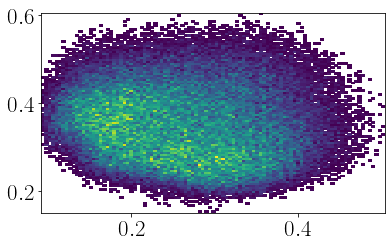

In [31]:
# plt.hist2d(np.sin(np.radians(dvcsSimInbCD.Etheta)),np.sin(np.radians(dvcsSimInbCD.xB)), bins = [101, 101], cmin = 1)
plt.hist2d(np.sin(np.radians(dvcsSimInbFD.Gtheta)),dvcsSimInbFD.xB, bins = [101, 101], cmin = 1)
plt.show()

In [32]:
k=2*M*(np.sqrt(0.42**2+M**2)-M)

In [33]:
epgExpInbCD.tcol.min()

0.2593835347302352

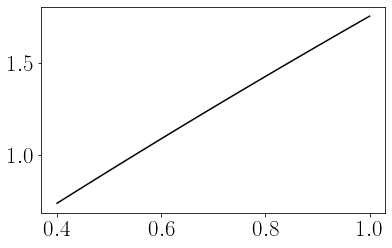

In [34]:
x4 = np.linspace(0.4, 1, 101)
# plt.plot(x4, 2*10.604*M*x4/(1+M*x4/10.604/(1-np.cos(8*np.pi/180.0))), color = 'k')
k=2*10.604*(np.sqrt(0.8**2+M**2)-M)
plt.plot(x4, 2*10.604*np.sqrt(M**2+0.4**2)*np.cos(5*np.pi/180)/(1+10.604/M/x4), color = 'k')


<AxesSubplot:>

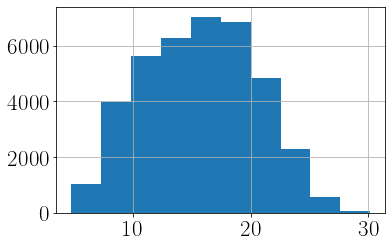

In [35]:
epgExpInbFD.Gtheta.hist()

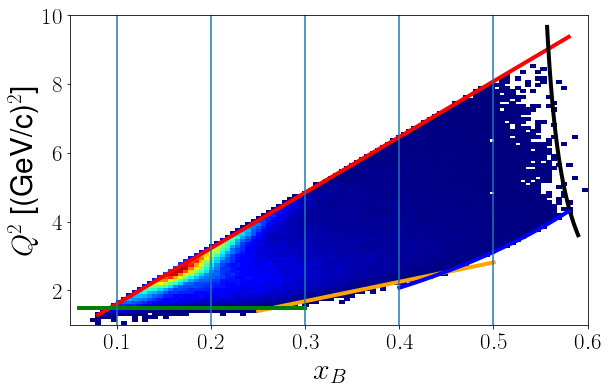

In [109]:
# plt.hist2d(epgExpInb.loc[epgExpInb.tmin2>0.3].xB, epgExpInb.loc[epgExpInb.tmin2>0.3].Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 10, 101)], cmin = 1)
# plt.hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 10, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 10, 101)], cmin = 1)
# plt.hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 10, 101)], cmin = 1)
plt.hist2d(epgExpInb.xB, epgExpInb.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 10, 101)], cmin = 1, cmap = cmap)

x1 = np.linspace(0.08, 0.58, 101)
plt.plot(x1, x1*2*M*(10.604-2), color = 'r', linewidth = 4)
x1 = np.linspace(0.25, 0.5, 101)
plt.plot(x1, x1*2*M*(3), color = 'orange', linewidth = 4)
x2 = np.linspace(0.06, 0.3, 101)
plt.plot(x2, 1.5+x2*0, color = 'green', linewidth = 4)
x4 = np.linspace(0.557, 0.59, 101)
# plt.plot(x4, 2*10.604*M*x4/(1+M*x4/10.604/(1-np.cos(8*np.pi/180.0))), color = 'k')
# plt.plot(x4, 2*10.604*np.sqrt(M**2+0.8**2)*np.cos(5*np.pi/180)/(1+10.604/M/x4), color = 'k')
k= 2*M*(np.sqrt(0.8**2+M**2)-M)
plt.plot(x4, M*M*x4/(M*M*x4*x4/k- (1-x4)), color = 'k', linewidth = 4)
x5 = np.linspace(0.4, 0.58, 101)
plt.plot(x5, (4 - M*M)*x5/(1 - x5), color = 'b', linewidth = 4)
plt.axvline(0.5)
plt.axvline(0.4)
plt.axvline(0.3)
plt.axvline(0.2)
plt.axvline(0.1)
plt.xlabel(r"$x_B$")
plt.ylabel(r"$Q^2$"+" ["+GeVc2+"]")
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
plt.show()

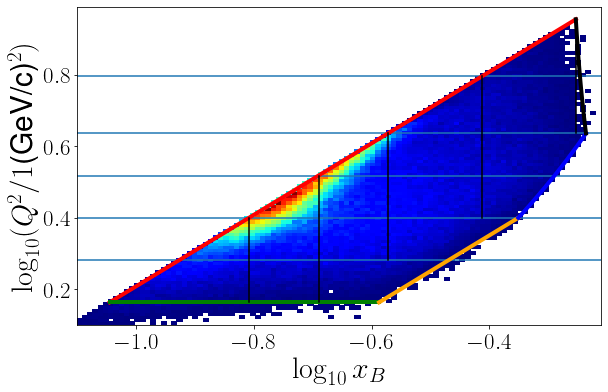

In [431]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
# plt.hist2d(epgExpInb.loc[epgExpInb.tmin2>0.3].xB, epgExpInb.loc[epgExpInb.tmin2>0.3].Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 10, 101)], cmin = 1)
# plt.hist2d(np.log10(epgExpInbFD.xB), np.log10(epgExpInbFD.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.95, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInbCD.xB), np.log10(epgExpInbCD.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 1, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInbCDFT.xB), np.log10(epgExpInbCDFT.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.95, 101)], cmin = 1, cmap = cmap)
plt.hist2d(np.log10(epgExpInb.xB), np.log10(epgExpInb.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.99, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInb61.xB), np.log10(epgExpInb61.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.99, 101)], cmin = 1, cmap = cmap)

k= 2*M*(np.sqrt(0.8**2+M**2)-M)
# plt.axvline(0.5)
# plt.axvline(0.4)
# plt.axvline(0.3)
# plt.axvline(0.2)
# plt.axvline(0.1)
x1 = 1.456/2/M/8.604
# plt.axvline(np.log10(x1))
x2 = 1.456/2/M/3
# plt.axvline(np.log10(x2))
x3 = 1-(4-M**2)/2/M/3
# plt.axvline(np.log10(x3))
x4 = 2*(1-np.sqrt((k-M**4+4*M**2)/k))/(M**4/k - 4*M**2/k)
# plt.axvline(np.log10(x4))
x5 = (-1+np.sqrt(1+4*M**2/k*(1+M/8.604/2)))/2/M**2*k
# plt.axvline(np.log10(x5))
y1 = 1.456
y2 = 1.456
y3 = 6*M*x3
plt.axhline(np.log10(y3))
y4 = (4-M**2)*x4/(1-x4)
plt.axhline(np.log10(y4))
y5 = 2*M*8.604*x5
plt.axhline(np.log10(y1*y3)/2)
plt.axhline(np.log10(y3*y4)/2)
plt.axhline(np.log10(y4*y5)/2)

l1 = np.linspace(x1, x5, 101)
plt.plot(np.log10(l1), np.log10(l1*2*M*(10.604-2)), color = 'r', linewidth = 4)
l2 = np.linspace(x1, x2, 101)
plt.plot(np.log10(l2), np.log10(y2+l2*0), color = 'green', linewidth = 4)
l3 = np.linspace(x2, x3, 101)
plt.plot(np.log10(l3), np.log10(l3*2*M*(3)), color = 'orange', linewidth = 4)
k= 2*M*(np.sqrt(0.8**2+M**2)-M)
l4 = np.linspace(x3, x4, 101)
plt.plot(np.log10(l4), np.log10((4 - M*M)*l4/(1 - l4)), color = 'b', linewidth = 4)
l5 = np.linspace(x5, x4, 101)
plt.plot(np.log10(l5), np.log10(M*M*l5/(M*M*l5*l5/k-(1-l5))), color = 'k', linewidth = 4)

# c11 = np.sqrt(np.sqrt(y1*y3)*y1)/2/M/8.6048
# c12 = np.sqrt(np.sqrt(y1*y3)*y1)/2/M/3
# c1 = np.sqrt(y2*y3)/2/M/8.604
# plt.plot(np.linspace(np.log10(c1),np.log10(c1), 101), np.linspace(np.log10(y1), np.log10(np.sqrt(y1*y3)), 101))
c2 = y3/2/M/8.604
plt.plot(np.linspace(np.log10(c2),np.log10(c2), 101), np.linspace(np.log10(y1), np.log10(y3), 101), color='k')
c3 = np.sqrt(y3*y4)/2/M/8.604
plt.plot(np.linspace(np.log10(c3),np.log10(c3), 101), np.linspace(np.log10(y1), np.log10(np.sqrt(y3*y4)), 101), color='k')
c4 = y4/2/M/8.604
plt.plot(np.linspace(np.log10(c4),np.log10(c4), 101), np.linspace(np.log10(np.sqrt(y1*y3)), np.log10(y4), 101), color='k')
c5 = np.sqrt(y4*y5)/2/M/8.604
plt.plot(np.linspace(np.log10(c5),np.log10(c5), 101), np.linspace(np.log10(y3), np.log10(np.sqrt(y4*y5)), 101), color='k')
plt.plot(np.linspace(np.log10(x5),np.log10(x5), 101), np.linspace(np.log10(y4), np.log10(y5), 101), color='k')

plt.xlabel(r"$\log_{10} x_B$")
plt.ylabel(r"$\log_{10}(Q^2/1 $"+GeVc2+r"$)$")
plt.show()

In [447]:
epgExpInb1 = epgExpInb.loc[(epgExpInb.Q2>y1)&(epgExpInb.Q2<np.sqrt(y1*y3))]
epgExpInb11 = epgExpInb1.loc[(epgExpInb1.xB<c2)&(epgExpInb1.Q2<=2*M*(10.604-2)*epgExpInb1.xB)]
epgExpInb12 = epgExpInb1.loc[(epgExpInb1.xB>=c2)&(epgExpInb1.xB<c3)]
epgExpInb13 = epgExpInb1.loc[(epgExpInb1.xB>=c3)&(epgExpInb1.Q2>=2*M*3*epgExpInb1.xB)]
epgExpInb111, epgExpInb112, epgExpInb113, epgExpInb114 = tbinning(epgExpInb11)
epgExpInb121, epgExpInb122, epgExpInb123, epgExpInb124 = tbinning(epgExpInb12)
epgExpInb131, epgExpInb132, epgExpInb133, epgExpInb134 = tbinning(epgExpInb13)

epgExpInb2 = epgExpInb.loc[(epgExpInb.Q2>np.sqrt(y1*y3))&(epgExpInb.Q2<y3)]
epgExpInb21 = epgExpInb2.loc[(epgExpInb2.xB<c2)&(epgExpInb2.Q2<2*M*(10.604-2)*epgExpInb2.xB)]
epgExpInb22 = epgExpInb2.loc[(epgExpInb2.xB>=c2)&(epgExpInb2.xB<c3)]
epgExpInb23 = epgExpInb2.loc[(epgExpInb2.xB>=c3)&(epgExpInb2.xB<c4)]
epgExpInb24 = epgExpInb2.loc[(epgExpInb2.xB>=c4)&(epgExpInb2.Q2>=2*M*3*epgExpInb2.xB)]
epgExpInb211, epgExpInb212, epgExpInb213, epgExpInb214 = tbinning(epgExpInb21)
epgExpInb221, epgExpInb222, epgExpInb223, epgExpInb224 = tbinning(epgExpInb22)
epgExpInb231, epgExpInb232, epgExpInb233, epgExpInb234 = tbinning(epgExpInb23)
epgExpInb241, epgExpInb242, epgExpInb243, epgExpInb244 = tbinning(epgExpInb24)

epgExpInb3 = epgExpInb.loc[(epgExpInb.Q2>y3)&(epgExpInb.Q2<np.sqrt(y3*y4))]
epgExpInb31 = epgExpInb3.loc[(epgExpInb3.xB<c3)&(epgExpInb3.Q2<2*M*(10.604-2)*epgExpInb3.xB)]
epgExpInb32 = epgExpInb3.loc[(epgExpInb3.xB>=c3)&(epgExpInb3.xB<c4)]
epgExpInb33 = epgExpInb3.loc[(epgExpInb3.xB>=c4)&(epgExpInb3.xB<c5)]
epgExpInb34 = epgExpInb3.loc[(epgExpInb3.xB>=c5)&(epgExpInb3.Q2>=(4 - M*M)*epgExpInb3.xB/(1 - epgExpInb3.xB))]
epgExpInb311, epgExpInb312, epgExpInb313, epgExpInb314 = tbinning(epgExpInb31)
epgExpInb321, epgExpInb322, epgExpInb323, epgExpInb324 = tbinning(epgExpInb32)
epgExpInb331, epgExpInb332, epgExpInb333, epgExpInb334 = tbinning(epgExpInb33)
epgExpInb341, epgExpInb342, epgExpInb343, epgExpInb344 = tbinning(epgExpInb34)

epgExpInb4 = epgExpInb.loc[(epgExpInb.Q2>np.sqrt(y3*y4))&(epgExpInb.Q2<y4)]
epgExpInb41 = epgExpInb4.loc[(epgExpInb4.xB<c4)&(epgExpInb4.Q2<2*M*(10.604-2)*epgExpInb4.xB)]
epgExpInb42 = epgExpInb4.loc[(epgExpInb4.xB>=c4)&(epgExpInb4.xB<c5)]
epgExpInb43 = epgExpInb4.loc[(epgExpInb4.xB>=c5)&(epgExpInb4.Q2>=(4 - M*M)*epgExpInb4.xB/(1 - epgExpInb4.xB))]
epgExpInb411, epgExpInb412, epgExpInb413, epgExpInb414 = tbinning(epgExpInb41)
epgExpInb421, epgExpInb422, epgExpInb423, epgExpInb424 = tbinning(epgExpInb42)
epgExpInb431, epgExpInb432, epgExpInb433, epgExpInb434 = tbinning(epgExpInb43)

epgExpInb5 = epgExpInb.loc[(epgExpInb.Q2>y4)&(epgExpInb.Q2<np.sqrt(y4*y5))]
epgExpInb51 = epgExpInb5.loc[(epgExpInb5.xB<c5)&(epgExpInb5.Q2<2*M*(10.604-2)*epgExpInb5.xB)]
epgExpInb52 = epgExpInb5.loc[(epgExpInb5.xB>=c5)&(epgExpInb5.xB<x5)]
epgExpInb511, epgExpInb512, epgExpInb513, epgExpInb514 = tbinning(epgExpInb51)
epgExpInb521, epgExpInb522, epgExpInb523, epgExpInb524 = tbinning(epgExpInb52)

epgExpInb6 = epgExpInb.loc[(epgExpInb.Q2>np.sqrt(y4*y5))&(epgExpInb.Q2<y5)]
epgExpInb61 = epgExpInb6.loc[(epgExpInb6.xB<x5)&(epgExpInb6.Q2<2*M*(10.604-2)*epgExpInb6.xB)]
epgExpInb611, epgExpInb612, epgExpInb613, epgExpInb614 = tbinning(epgExpInb61)

In [445]:
print(len(epgExpInb111), len(epgExpInb112), len(epgExpInb113), len(epgExpInb114))
print(len(epgExpInb121), len(epgExpInb122), len(epgExpInb123), len(epgExpInb124))
print(len(epgExpInb131), len(epgExpInb132), len(epgExpInb133), len(epgExpInb134))
print(len(epgExpInb211), len(epgExpInb212), len(epgExpInb213), len(epgExpInb214))
print(len(epgExpInb221), len(epgExpInb222), len(epgExpInb223), len(epgExpInb224))
print(len(epgExpInb231), len(epgExpInb232), len(epgExpInb233), len(epgExpInb234))
print(len(epgExpInb241), len(epgExpInb242), len(epgExpInb243), len(epgExpInb244))
print(len(epgExpInb311), len(epgExpInb312), len(epgExpInb313), len(epgExpInb314))
print(len(epgExpInb321), len(epgExpInb322), len(epgExpInb323), len(epgExpInb324))
print(len(epgExpInb331), len(epgExpInb332), len(epgExpInb333), len(epgExpInb334))
print(len(epgExpInb341), len(epgExpInb342), len(epgExpInb343), len(epgExpInb344))
print(len(epgExpInb411), len(epgExpInb412), len(epgExpInb413), len(epgExpInb414))
print(len(epgExpInb421), len(epgExpInb422), len(epgExpInb423), len(epgExpInb424))
print(len(epgExpInb431), len(epgExpInb432), len(epgExpInb433), len(epgExpInb434))
print(len(epgExpInb511), len(epgExpInb512), len(epgExpInb513), len(epgExpInb514))
print(len(epgExpInb521), len(epgExpInb522), len(epgExpInb523), len(epgExpInb524))
print(len(epgExpInb611), len(epgExpInb612), len(epgExpInb613), len(epgExpInb614))

3382 3481 2970 2228
1446 1677 1197 922
666 1879 1629 795
7379 4234 3150 2544
6725 8471 7003 5453
2026 5073 4530 2627
168 2334 4607 2641
8698 14512 12194 5249
2249 7489 9791 6572
121 3089 7326 4679
0 117 1900 1844
1488 6199 9020 4882
71 2408 6791 5145
0 153 2466 3653
21 958 3638 3097
0 149 2616 3812
0 3 431 934


In [461]:
pi0ExpInb1 = pi0ExpInb.loc[(pi0ExpInb.Q2>y1)&(pi0ExpInb.Q2<np.sqrt(y1*y3))]
pi0ExpInb11 = pi0ExpInb1.loc[(pi0ExpInb1.xB<c2)&(pi0ExpInb1.Q2<=2*M*(10.604-2)*pi0ExpInb1.xB)]
pi0ExpInb12 = pi0ExpInb1.loc[(pi0ExpInb1.xB>=c2)&(pi0ExpInb1.xB<c3)]
pi0ExpInb13 = pi0ExpInb1.loc[(pi0ExpInb1.xB>=c3)&(pi0ExpInb1.Q2>=2*M*3*pi0ExpInb1.xB)]
pi0ExpInb111, pi0ExpInb112, pi0ExpInb113, pi0ExpInb114 = tbinning(pi0ExpInb11)
pi0ExpInb121, pi0ExpInb122, pi0ExpInb123, pi0ExpInb124 = tbinning(pi0ExpInb12)
pi0ExpInb131, pi0ExpInb132, pi0ExpInb133, pi0ExpInb134 = tbinning(pi0ExpInb13)

pi0ExpInb2 = pi0ExpInb.loc[(pi0ExpInb.Q2>np.sqrt(y1*y3))&(pi0ExpInb.Q2<y3)]
pi0ExpInb21 = pi0ExpInb2.loc[(pi0ExpInb2.xB<c2)&(pi0ExpInb2.Q2<2*M*(10.604-2)*pi0ExpInb2.xB)]
pi0ExpInb22 = pi0ExpInb2.loc[(pi0ExpInb2.xB>=c2)&(pi0ExpInb2.xB<c3)]
pi0ExpInb23 = pi0ExpInb2.loc[(pi0ExpInb2.xB>=c3)&(pi0ExpInb2.xB<c4)]
pi0ExpInb24 = pi0ExpInb2.loc[(pi0ExpInb2.xB>=c4)&(pi0ExpInb2.Q2>=2*M*3*pi0ExpInb2.xB)]
pi0ExpInb211, pi0ExpInb212, pi0ExpInb213, pi0ExpInb214 = tbinning(pi0ExpInb21)
pi0ExpInb221, pi0ExpInb222, pi0ExpInb223, pi0ExpInb224 = tbinning(pi0ExpInb22)
pi0ExpInb231, pi0ExpInb232, pi0ExpInb233, pi0ExpInb234 = tbinning(pi0ExpInb23)
pi0ExpInb241, pi0ExpInb242, pi0ExpInb243, pi0ExpInb244 = tbinning(pi0ExpInb24)

pi0ExpInb3 = pi0ExpInb.loc[(pi0ExpInb.Q2>y3)&(pi0ExpInb.Q2<np.sqrt(y3*y4))]
pi0ExpInb31 = pi0ExpInb3.loc[(pi0ExpInb3.xB<c3)&(pi0ExpInb3.Q2<2*M*(10.604-2)*pi0ExpInb3.xB)]
pi0ExpInb32 = pi0ExpInb3.loc[(pi0ExpInb3.xB>=c3)&(pi0ExpInb3.xB<c4)]
pi0ExpInb33 = pi0ExpInb3.loc[(pi0ExpInb3.xB>=c4)&(pi0ExpInb3.xB<c5)]
pi0ExpInb34 = pi0ExpInb3.loc[(pi0ExpInb3.xB>=c5)&(pi0ExpInb3.Q2>=(4 - M*M)*pi0ExpInb3.xB/(1 - pi0ExpInb3.xB))]
pi0ExpInb311, pi0ExpInb312, pi0ExpInb313, pi0ExpInb314 = tbinning(pi0ExpInb31)
pi0ExpInb321, pi0ExpInb322, pi0ExpInb323, pi0ExpInb324 = tbinning(pi0ExpInb32)
pi0ExpInb331, pi0ExpInb332, pi0ExpInb333, pi0ExpInb334 = tbinning(pi0ExpInb33)
pi0ExpInb341, pi0ExpInb342, pi0ExpInb343, pi0ExpInb344 = tbinning(pi0ExpInb34)

pi0ExpInb4 = pi0ExpInb.loc[(pi0ExpInb.Q2>np.sqrt(y3*y4))&(pi0ExpInb.Q2<y4)]
pi0ExpInb41 = pi0ExpInb4.loc[(pi0ExpInb4.xB<c4)&(pi0ExpInb4.Q2<2*M*(10.604-2)*pi0ExpInb4.xB)]
pi0ExpInb42 = pi0ExpInb4.loc[(pi0ExpInb4.xB>=c4)&(pi0ExpInb4.xB<c5)]
pi0ExpInb43 = pi0ExpInb4.loc[(pi0ExpInb4.xB>=c5)&(pi0ExpInb4.Q2>=(4 - M*M)*pi0ExpInb4.xB/(1 - pi0ExpInb4.xB))]
pi0ExpInb411, pi0ExpInb412, pi0ExpInb413, pi0ExpInb414 = tbinning(pi0ExpInb41)
pi0ExpInb421, pi0ExpInb422, pi0ExpInb423, pi0ExpInb424 = tbinning(pi0ExpInb42)
pi0ExpInb431, pi0ExpInb432, pi0ExpInb433, pi0ExpInb434 = tbinning(pi0ExpInb43)

pi0ExpInb5 = pi0ExpInb.loc[(pi0ExpInb.Q2>y4)&(pi0ExpInb.Q2<np.sqrt(y4*y5))]
pi0ExpInb51 = pi0ExpInb5.loc[(pi0ExpInb5.xB<c5)&(pi0ExpInb5.Q2<2*M*(10.604-2)*pi0ExpInb5.xB)]
pi0ExpInb52 = pi0ExpInb5.loc[(pi0ExpInb5.xB>=c5)&(pi0ExpInb5.xB<x5)]
pi0ExpInb511, pi0ExpInb512, pi0ExpInb513, pi0ExpInb514 = tbinning(pi0ExpInb51)
pi0ExpInb521, pi0ExpInb522, pi0ExpInb523, pi0ExpInb524 = tbinning(pi0ExpInb52)

pi0ExpInb6 = pi0ExpInb.loc[(pi0ExpInb.Q2>np.sqrt(y4*y5))&(pi0ExpInb.Q2<y5)]
pi0ExpInb61 = pi0ExpInb6.loc[(pi0ExpInb6.xB<x5)&(pi0ExpInb6.Q2<2*M*(10.604-2)*pi0ExpInb6.xB)]
pi0ExpInb611, pi0ExpInb612, pi0ExpInb613, pi0ExpInb614 = tbinning(pi0ExpInb61)

In [462]:
print(len(pi0ExpInb111), len(pi0ExpInb112), len(pi0ExpInb113), len(pi0ExpInb114))
print(len(pi0ExpInb121), len(pi0ExpInb122), len(pi0ExpInb123), len(pi0ExpInb124))
print(len(pi0ExpInb131), len(pi0ExpInb132), len(pi0ExpInb133), len(pi0ExpInb134))
print(len(pi0ExpInb211), len(pi0ExpInb212), len(pi0ExpInb213), len(pi0ExpInb214))
print(len(pi0ExpInb221), len(pi0ExpInb222), len(pi0ExpInb223), len(pi0ExpInb224))
print(len(pi0ExpInb231), len(pi0ExpInb232), len(pi0ExpInb233), len(pi0ExpInb234))
print(len(pi0ExpInb241), len(pi0ExpInb242), len(pi0ExpInb243), len(pi0ExpInb244))
print(len(pi0ExpInb311), len(pi0ExpInb312), len(pi0ExpInb313), len(pi0ExpInb314))
print(len(pi0ExpInb321), len(pi0ExpInb322), len(pi0ExpInb323), len(pi0ExpInb324))
print(len(pi0ExpInb331), len(pi0ExpInb332), len(pi0ExpInb333), len(pi0ExpInb334))
print(len(pi0ExpInb341), len(pi0ExpInb342), len(pi0ExpInb343), len(pi0ExpInb344))
print(len(pi0ExpInb411), len(pi0ExpInb412), len(pi0ExpInb413), len(pi0ExpInb414))
print(len(pi0ExpInb421), len(pi0ExpInb422), len(pi0ExpInb423), len(pi0ExpInb424))
print(len(pi0ExpInb431), len(pi0ExpInb432), len(pi0ExpInb433), len(pi0ExpInb434))
print(len(pi0ExpInb511), len(pi0ExpInb512), len(pi0ExpInb513), len(pi0ExpInb514))
print(len(pi0ExpInb521), len(pi0ExpInb522), len(pi0ExpInb523), len(pi0ExpInb524))
print(len(pi0ExpInb611), len(pi0ExpInb612), len(pi0ExpInb613), len(pi0ExpInb614))

222 348 566 842
226 430 667 782
291 871 1349 1261
151 209 277 370
366 733 992 1320
404 1030 1754 1880
236 1643 4010 4251
178 290 512 474
222 632 1269 1531
161 1380 3573 4371
0 171 2316 3903
48 192 372 494
36 568 1777 2440
0 99 1740 4865
3 114 465 767
0 34 866 3205
0 0 55 427


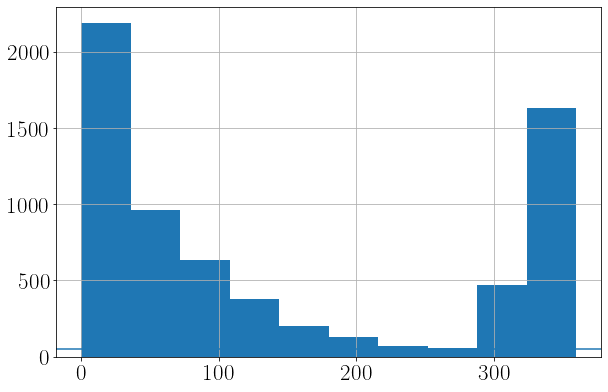

In [460]:
# pd.concat([epgExpInb133, epgExpInb134]).phi2.hist(bins = np.linspace(0, 360, 11))
epgExpInb221.phi2.hist(bins = np.linspace(0, 360, 11))
# plt.ylim(0,60)
plt.axhline(50)

In [420]:
epgExpInb_bin1 = epgExpInb111
epgExpInb_bin2 = epgExpInb112
epgExpInb_bin3 = epgExpInb113
epgExpInb_bin4 = epgExpInb114
epgExpInb_bin5 = epgExpInb121
epgExpInb_bin6 = epgExpInb122
epgExpInb_bin7 = epgExpInb123
epgExpInb_bin8 = epgExpInb124
epgExpInb_bin9 = epgExpInb131
epgExpInb_bin10 = epgExpInb132
epgExpInb_bin11 = epgExpInb133
epgExpInb_bin12 = epgExpInb134
epgExpInb_bin13 = epgExpInb211
epgExpInb_bin14 = epgExpInb212
epgExpInb_bin15 = epgExpInb213
epgExpInb_bin16 = epgExpInb214
epgExpInb_bin17 = epgExpInb221
epgExpInb_bin18 = epgExpInb222


# epgExpInb_bin4 = epgExpInb211
# epgExpInb_bin5 = epgExpInb212
# epgExpInb_bin6 = epgExpInb213
# epgExpInb_bin7 = epgExpInb214
# epgExpInb_bin8

In [446]:
def tbinning(df):
    return df[(df.t2>=10**(-1.1))&(df.t2<10**(-0.8))], df[(df.t2>=10**(-0.8))&(df.t2<10**(-0.6))], df[(df.t2>=10**(-0.6))&(df.t2<10**(-0.4))], df[(df.t2>=0.4)&(df.t2<=10**(-0.2))]

In [414]:
dvcsSimInb1 = dvcsSimInb.loc[(dvcsSimInb.Q2>y1)&(dvcsSimInb.Q2<np.sqrt(y1*y3))]
dvcsSimInb11 = dvcsSimInb1.loc[(dvcsSimInb1.xB<c2)&(dvcsSimInb1.Q2<=2*M*(10.604-2)*dvcsSimInb1.xB)]
dvcsSimInb12 = dvcsSimInb1.loc[(dvcsSimInb1.xB>=c2)&(dvcsSimInb1.xB<c3)]
dvcsSimInb13 = dvcsSimInb1.loc[(dvcsSimInb1.xB>=c3)&(dvcsSimInb1.Q2>=2*M*3*dvcsSimInb1.xB)]
dvcsSimInb111, dvcsSimInb112, dvcsSimInb113, dvcsSimInb114 = tbinning(dvcsSimInb11)
dvcsSimInb121, dvcsSimInb122, dvcsSimInb123, dvcsSimInb124 = tbinning(dvcsSimInb12)
dvcsSimInb131, dvcsSimInb132, dvcsSimInb133, dvcsSimInb134 = tbinning(dvcsSimInb13)

dvcsSimInb2 = dvcsSimInb.loc[(dvcsSimInb.Q2>np.sqrt(y1*y3))&(dvcsSimInb.Q2<y3)]
dvcsSimInb21 = dvcsSimInb2.loc[(dvcsSimInb2.xB<c2)&(dvcsSimInb2.Q2<2*M*(10.604-2)*dvcsSimInb2.xB)]
dvcsSimInb22 = dvcsSimInb2.loc[(dvcsSimInb2.xB>=c2)&(dvcsSimInb2.xB<c3)]
dvcsSimInb23 = dvcsSimInb2.loc[(dvcsSimInb2.xB>=c3)&(dvcsSimInb2.xB<c4)]
dvcsSimInb24 = dvcsSimInb2.loc[(dvcsSimInb2.xB>=c4)&(dvcsSimInb2.Q2>=2*M*3*dvcsSimInb2.xB)]
dvcsSimInb211, dvcsSimInb212, dvcsSimInb213, dvcsSimInb214 = tbinning(dvcsSimInb21)
dvcsSimInb221, dvcsSimInb222, dvcsSimInb223, dvcsSimInb224 = tbinning(dvcsSimInb22)
dvcsSimInb231, dvcsSimInb232, dvcsSimInb233, dvcsSimInb234 = tbinning(dvcsSimInb23)
dvcsSimInb241, dvcsSimInb242, dvcsSimInb243, dvcsSimInb244 = tbinning(dvcsSimInb24)

dvcsSimInb3 = dvcsSimInb.loc[(dvcsSimInb.Q2>y3)&(dvcsSimInb.Q2<np.sqrt(y3*y4))]
dvcsSimInb31 = dvcsSimInb3.loc[(dvcsSimInb3.xB<c3)&(dvcsSimInb3.Q2<2*M*(10.604-2)*dvcsSimInb3.xB)]
dvcsSimInb32 = dvcsSimInb3.loc[(dvcsSimInb3.xB>=c3)&(dvcsSimInb3.xB<c4)]
dvcsSimInb33 = dvcsSimInb3.loc[(dvcsSimInb3.xB>=c4)&(dvcsSimInb3.xB<c5)]
dvcsSimInb34 = dvcsSimInb3.loc[(dvcsSimInb3.xB>=c5)&(dvcsSimInb3.Q2>=(4 - M*M)*dvcsSimInb3.xB/(1 - dvcsSimInb3.xB))]
dvcsSimInb311, dvcsSimInb312, dvcsSimInb313, dvcsSimInb314 = tbinning(dvcsSimInb31)
dvcsSimInb321, dvcsSimInb322, dvcsSimInb323, dvcsSimInb324 = tbinning(dvcsSimInb32)
dvcsSimInb331, dvcsSimInb332, dvcsSimInb333, dvcsSimInb334 = tbinning(dvcsSimInb33)
dvcsSimInb341, dvcsSimInb342, dvcsSimInb343, dvcsSimInb344 = tbinning(dvcsSimInb34)

dvcsSimInb4 = dvcsSimInb.loc[(dvcsSimInb.Q2>np.sqrt(y3*y4))&(dvcsSimInb.Q2<y4)]
dvcsSimInb41 = dvcsSimInb4.loc[(dvcsSimInb4.xB<c4)&(dvcsSimInb4.Q2<2*M*(10.604-2)*dvcsSimInb4.xB)]
dvcsSimInb42 = dvcsSimInb4.loc[(dvcsSimInb4.xB>=c4)&(dvcsSimInb4.xB<c5)]
dvcsSimInb43 = dvcsSimInb4.loc[(dvcsSimInb4.xB>=c5)&(dvcsSimInb4.Q2>=(4 - M*M)*dvcsSimInb4.xB/(1 - dvcsSimInb4.xB))]
dvcsSimInb411, dvcsSimInb412, dvcsSimInb413, dvcsSimInb414 = tbinning(dvcsSimInb41)
dvcsSimInb421, dvcsSimInb422, dvcsSimInb423, dvcsSimInb424 = tbinning(dvcsSimInb42)
dvcsSimInb431, dvcsSimInb432, dvcsSimInb433, dvcsSimInb434 = tbinning(dvcsSimInb43)

dvcsSimInb5 = dvcsSimInb.loc[(dvcsSimInb.Q2>y4)&(dvcsSimInb.Q2<np.sqrt(y4*y5))]
dvcsSimInb51 = dvcsSimInb5.loc[(dvcsSimInb5.xB<c5)&(dvcsSimInb5.Q2<2*M*(10.604-2)*dvcsSimInb5.xB)]
dvcsSimInb52 = dvcsSimInb5.loc[(dvcsSimInb5.xB>=c5)&(dvcsSimInb5.xB<x5)]
dvcsSimInb511, dvcsSimInb512, dvcsSimInb513, dvcsSimInb514 = tbinning(dvcsSimInb51)
dvcsSimInb521, dvcsSimInb522, dvcsSimInb523, dvcsSimInb524 = tbinning(dvcsSimInb52)

dvcsSimInb6 = dvcsSimInb.loc[(dvcsSimInb.Q2>np.sqrt(y4*y5))&(dvcsSimInb.Q2<y5)]
dvcsSimInb61 = dvcsSimInb6.loc[(dvcsSimInb6.xB<x5)&(dvcsSimInb6.Q2<2*M*(10.604-2)*dvcsSimInb6.xB)]
dvcsSimInb611, dvcsSimInb612, dvcsSimInb613, dvcsSimInb614 = tbinning(dvcsSimInb61)

In [80]:
len(epgExpInb11), len(epgExpInb12), len(epgExpInb13)

(12120, 5257, 4980)

In [81]:
len(epgExpInb21), len(epgExpInb22), len(epgExpInb23), len(epgExpInb24)

(17410, 27748, 14287, 9788)

In [83]:
len(epgExpInb31), len(epgExpInb32), len(epgExpInb33), len(epgExpInb34)

(40768, 26209, 15304, 3889)

In [84]:
len(epgExpInb41), len(epgExpInb42), len(epgExpInb43)

(21670, 14485, 6327)

In [85]:
len(epgExpInb51), len(epgExpInb52)

(7789, 6628)

<AxesSubplot:>

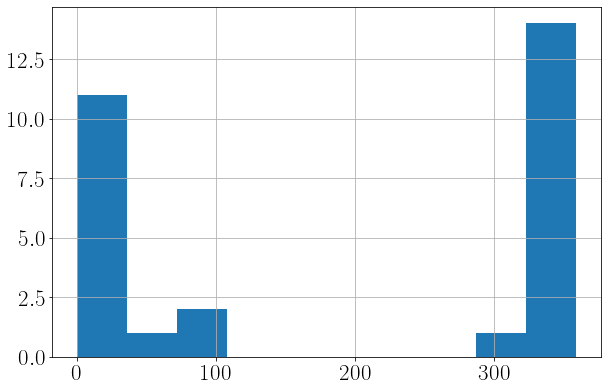

In [375]:
epgExpInb.loc[epgExpInb.t2<10**(-1.15)].phi2.hist()

In [392]:
sum(epgExpInb.t2<10**(-1.1))/len(epgExpInb)

0.0005516950937039377

In [385]:
10**(-0.12)

0.7585775750291838

In [169]:
sum((epgExpInb.t2>=0.2)&(epgExpInb.t2<0.3))/len(epgExpInb)

0.27190566435038954

In [170]:
sum((epgExpInb.t2>=0.3)&(epgExpInb.t2<0.4))/len(epgExpInb)

0.21823541798273322

In [171]:
sum((epgExpInb.t2>=0.4)&(epgExpInb.t2<0.6))/len(epgExpInb)

0.2300315855969678

In [167]:
sum((epgExpInb.t2>=0.6)&(epgExpInb.t2<0.8))/len(epgExpInbFD)

0.023416049318758743

In [82]:
print(len(epgExpInb1), len(epgExpInb2), len(epgExpInb3), len(epgExpInb4), len(epgExpInb5), len(epgExpInb6))

22395 69267 86170 42482 14451 1392


In [88]:
print(y1, np.sqrt(y1*y3), y3, np.sqrt(y3*y4), y4, np.sqrt(y4*y5), y5)

1.456 1.9116853947971688 2.5099869839840707 3.2950476730109357 4.325655565823319 6.244622996331703 9.014891678943144


In [89]:
print(x1, x2, x3, x4, x5)

0.09017832905248818 0.2586314477225361 0.44585272488497407 0.5809913563480243 0.5583433160688684


In [147]:
# 2*M*(np.sqrt(0.8**2+M**2)-M)
2*M*(np.sqrt(0.42**2+M**2)-M)
# 2*M*(np.sqrt(0.35**2+M**2)-M)

0.1683514754170096

In [125]:
epgExpInb1.t2.max()

0.7177133621527823

In [ ]:
10**(-0.6)

In [ ]:
1-(4-M**2)/2/M/3

In [ ]:
6*M-4+M**2

In [ ]:
2*(1-np.sqrt((k-M**4+4*M**2)/k))/(M**4/k - 4*M**2/k)

In [ ]:
(-1+np.sqrt(1+4*M**2/k*(1+M/8.604/2)))/2/M**2*k

In [ ]:
for i in np.linspace(1.5, 1.8, 11):
    print(np.sum(np.log10(epgExpInb.Q2)<np.log10(i))/len(epgExpInb))

In [ ]:
2*10.604*(10.604-3-np.sqrt(M**2+0.32**2)+M)*(1-np.cos(7.5*np.pi/180))

In [ ]:
len(epgExpInb.loc[(epgExpInb.Q2>1.47)])/len(epgExpInb)

In [ ]:
len(epgExpInb.loc[(epgExpInb.Q2<1.4)])

In [ ]:
epgExpInb.Q2.hist(bins = np.linspace(1, 1.5, 101))

In [ ]:
2*10.604*7.604*(1-np.cos(7.31*np.pi/180))

In [ ]:
plt.hist2d(dvcsSimInbCD.xB, dvcsSimInbCD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
plt.show()

In [ ]:
plt.hist2d(dvcsSimInbCDFT.xB, dvcsSimInbCDFT.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
# plt.hist2d(dvcsSimInbFD.xB, dvcsSimInbFD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
# plt.hist2d(dvcsSimInbCD.xB, dvcsSimInbCD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
x1 = np.linspace(0, 1, 101)
plt.plot(x1, x1*2*M*(10.604-2), color = 'r') #nu
x1 = np.linspace(0, 1, 101)
plt.plot(x1, x1*2*M*(3), color = 'r')#nu
x2 = np.linspace(0, 1, 101)
# plt.plot(x2, 1+x2*0, color = 'r')
x3 = np.linspace(0,1, 101)
# plt.plot(x1, x1*M**2/(M**2*x1**2-(1-x1)*0.553), color = 'k')
x4 = np.linspace(0.55, 1, 101)
plt.plot(x4, 2*10.604*M*x4/(1+M*x4/10.604/(1-np.cos(35*np.pi/180.0))), color = 'k')#electron theta
plt.plot(x1, 40*(x1-0.22)+1.8, color = 'g')
plt.plot(x4, M*M*x4/(M*M*x4*x4/k- (1-x4)), color = 'k')#tmin
x5 = np.linspace(0, 0.9, 101)
plt.plot(x5, (4 - M*M)*x5/(1 - x5), color = 'b')#W
plt.plot(x2, 2*10.604*7.604*(1-np.cos(5*np.pi/180))+x2*0, color = 'r')#
plt.show()

In [ ]:
plt.hist2d(df_4076_1g_corr.xB, df_4076_1g_corr.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
# plt.hist2d(dvcsSimInbFD.xB, dvcsSimInbFD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
# plt.hist2d(dvcsSimInbCD.xB, dvcsSimInbCD.Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
x1 = np.linspace(0, 1, 101)
plt.plot(x1, x1*2*M*(10.604-2), color = 'r') #nu
x1 = np.linspace(0, 1, 101)
plt.plot(x1, x1*2*M*(3), color = 'r')#nu
x2 = np.linspace(0, 1, 101)
# plt.plot(x2, 1+x2*0, color = 'r')
x3 = np.linspace(0,1, 101)
# plt.plot(x1, x1*M**2/(M**2*x1**2-(1-x1)*0.553), color = 'k')
x4 = np.linspace(0.55, 1, 101)
plt.plot(x4, 2*10.604*M*x4/(1+M*x4/10.604/(1-np.cos(35*np.pi/180.0))), color = 'k')#electron theta
plt.plot(x1, 40*(x1-0.22)+1.8, color = 'g')
plt.plot(x4, M*M*x4/(M*M*x4*x4/k- (1-x4)), color = 'k')#tmin
x5 = np.linspace(0, 0.9, 101)
plt.plot(x5, (4 - M*M)*x5/(1 - x5), color = 'b')#W
plt.plot(x2, 2*10.604*7.604*(1-np.cos(5*np.pi/180))+x2*0, color = 'r')#
plt.show()

In [ ]:
plt.hist2d(dvcsSimInbFD.GenxB, dvcsSimInbFD.GenQ2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 8, 101)], cmin = 1)
plt.show()

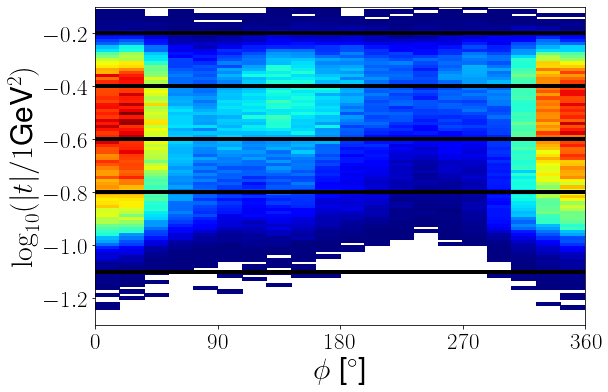

In [449]:
plt.hist2d(epgExpInb.phi2, np.log10(epgExpInb.t2), bins = [np.linspace(0, 360, 21), np.linspace(-1.3, -0.1, 101)], cmin = 1, cmap = cmap)
plt.ylabel(r"$\log_{10}(|t|/1 $"+GeV2+r"$)$")
plt.xlabel(r"$\phi$" +" ["+degree+"]")
plt.axhline(-1.1, color = 'k', linewidth = 4)
plt.axhline(-.8, color = 'k', linewidth = 4)
plt.axhline(-.6, color = 'k', linewidth = 4)
plt.axhline(-.4, color = 'k', linewidth = 4)
plt.axhline(-.2, color = 'k', linewidth = 4)
plt.xticks([0, 90, 180, 270, 360])
plt.show()

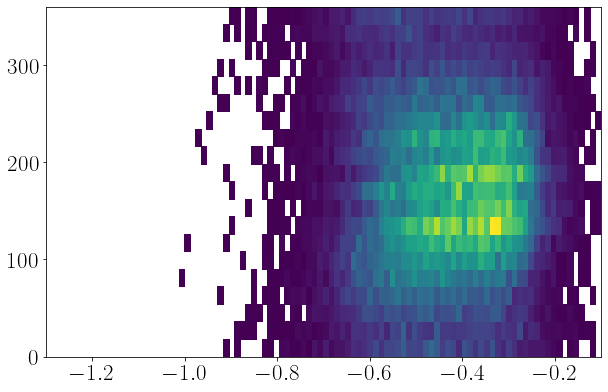

In [395]:
plt.hist2d(np.log10(epgExpInbFD.t2), epgExpInbFD.phi2, bins = [np.linspace(-1.3, -0.1, 101), np.linspace(0, 360, 21)], cmin = 1)
plt.show()

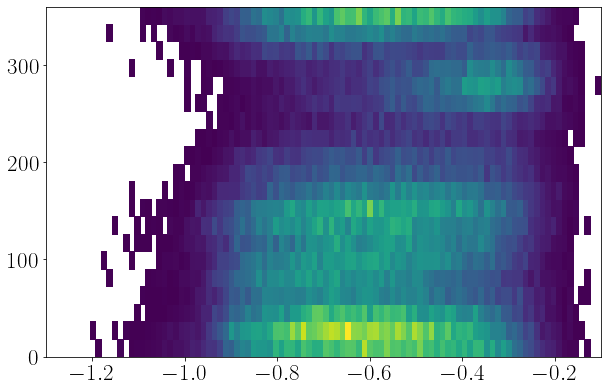

In [396]:
plt.hist2d(np.log10(epgExpInbCD.t2), epgExpInbCD.phi2, bins = [np.linspace(-1.3, -0.1, 101), np.linspace(0, 360, 21)], cmin = 1)
plt.show()

In [ ]:
plt.hist2d(dvcsSimInbCD.t2, dvcsSimInbCD.phi2, bins = [np.linspace(0.05, 0.7, 101), np.linspace(0, 360, 21)], cmin = 1)
plt.show()

In [ ]:
plt.hist2d(epgExpInbCDFT.t2, epgExpInbCDFT.phi2, bins = [np.linspace(0.05, 0.7, 101), np.linspace(0, 360, 21)], cmin = 1)
plt.show()

In [ ]:
plt.hist2d(dvcsSimInbCDFT.t2, dvcsSimInbCDFT.phi2, bins = [np.linspace(0.05, 0.7, 101), np.linspace(0, 360, 21)], cmin = 1)
plt.show()

In [ ]:
plt.hist2d(dvcsSimInbFD.xB, dvcsSimInbFD.t2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(0.05, 0.7, 101)], cmin = 1)
plt.show()

In [ ]:
plt.hist2d(dvcsSimInbCD.xB, dvcsSimInbCD.t2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(0.05, 0.7, 101)], cmin = 1)
plt.show()

In [ ]:
plt.hist2d(dvcsSimInbCDFT.xB, dvcsSimInbCDFT.t2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(0.05, 0.7, 101)], cmin = 1)
plt.show()

In [ ]:
plt.hist2d(dvcsSimInbFD.t2, dvcsSimInbFD.Q2, bins = [np.linspace(0.05, 0.7, 101), np.linspace(1, 8, 101)], cmin = 1)
plt.show()

In [ ]:
plt.hist2d(dvcsSimInbCD.t2, dvcsSimInbCD.Q2, bins = [np.linspace(0.05, 0.7, 101), np.linspace(1, 8, 101)], cmin = 1)
plt.show()

In [ ]:
plt.hist2d(dvcsSimInbCDFT.t2, dvcsSimInbCDFT.Q2, bins = [np.linspace(0.05, 0.7, 101), np.linspace(1, 8, 101)], cmin = 1)
plt.show()

<AxesSubplot:>

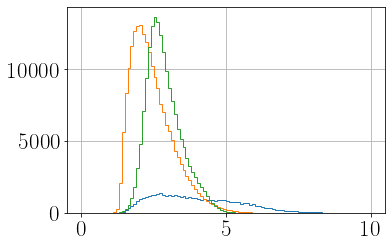

In [219]:
dvcsSimInbFD.Q2.hist(bins = np.linspace(0, 10, 101), histtype = 'step')
dvcsSimInbCD.Q2.hist(bins = np.linspace(0, 10, 101), histtype = 'step')
dvcsSimInbCDFT.Q2.hist(bins = np.linspace(0, 10, 101), histtype = 'step')

<AxesSubplot:>

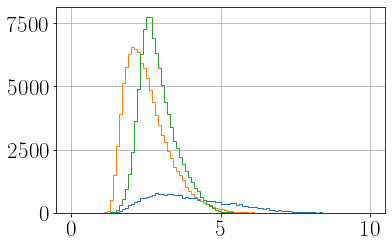

In [218]:
epgExpInbFD.Q2.hist(bins = np.linspace(0, 10, 101), histtype = 'step')
epgExpInbCD.Q2.hist(bins = np.linspace(0, 10, 101), histtype = 'step')
epgExpInbCDFT.Q2.hist(bins = np.linspace(0, 10, 101), histtype = 'step')

In [531]:
expFD = (1-contFD)*len(epgExpInbFD)/ ((1-contFD)*len(epgExpInbFD) + (1-contCD)*len(epgExpInbCD) + (1-contCDFT)*len(epgExpInbCDFT))
expCD = (1-contCD)*len(epgExpInbCD)/ ((1-contFD)*len(epgExpInbFD) + (1-contCD)*len(epgExpInbCD) + (1-contCDFT)*len(epgExpInbCDFT))
expCDFT = len(epgExpInbCDFT)/ ((1-contFD)*len(epgExpInbFD) + (1-contCD)*len(epgExpInbCD) + (1-contCDFT)*len(epgExpInbCDFT))

In [534]:
simFD = len(dvcsSimInbFD)/ (len(dvcsSimInbFD) + len(dvcsSimInbCD) + len(dvcsSimInbCDFT))
simCD = len(dvcsSimInbCD)/ (len(dvcsSimInbFD) + len(dvcsSimInbCD) + len(dvcsSimInbCDFT))
simCDFT = len(dvcsSimInbCDFT)/ (len(dvcsSimInbFD) + len(dvcsSimInbCD) + len(dvcsSimInbCDFT))

In [474]:
contFD = len(pi0ExpInbFD.loc[(pi0ExpInbFD.phi2<300)&(pi0ExpInbFD.phi2>100)])*len(bkgSimInbFD.loc[(bkgSimInbFD.phi2<300)&(bkgSimInbFD.phi2>100)])/len(pi0SimInbFD.loc[(pi0SimInbFD.phi2<300)&(pi0SimInbFD.phi2>100)])/len(epgExpInbFD.loc[(epgExpInbFD.phi2<300)&(epgExpInbFD.phi2>100)])

In [518]:
contFD = 0.27

In [545]:
expFD = (1-contFD)*len(epgExpInbFD.loc[(epgExpInbFD.phi2<300)&(epgExpInbFD.phi2>100)])/ ((1-contFD)*len(epgExpInbFD.loc[(epgExpInbFD.phi2<300)&(epgExpInbFD.phi2>100)]) + (1-contCD)*len(epgExpInbCD.loc[(epgExpInbCD.phi2<300)&(epgExpInbCD.phi2>100)]))
expCD = (1-contCD)*len(epgExpInbCD.loc[(epgExpInbCD.phi2<300)&(epgExpInbCD.phi2>100)])/ ((1-contFD)*len(epgExpInbFD.loc[(epgExpInbFD.phi2<300)&(epgExpInbFD.phi2>100)]) + (1-contCD)*len(epgExpInbCD.loc[(epgExpInbCD.phi2<300)&(epgExpInbCD.phi2>100)]))

In [546]:
simFD = len(dvcsSimInbFD.loc[(dvcsSimInbFD.phi2<300)&(dvcsSimInbFD.phi2>100)])/ (len(dvcsSimInbFD.loc[(dvcsSimInbFD.phi2<300)&(dvcsSimInbFD.phi2>100)]) + len(dvcsSimInbCD.loc[(dvcsSimInbCD.phi2<300)&(dvcsSimInbCD.phi2>100)]))
simCD = len(dvcsSimInbCD.loc[(dvcsSimInbCD.phi2<300)&(dvcsSimInbCD.phi2>100)])/ (len(dvcsSimInbFD.loc[(dvcsSimInbFD.phi2<300)&(dvcsSimInbFD.phi2>100)]) + len(dvcsSimInbCD.loc[(dvcsSimInbCD.phi2<300)&(dvcsSimInbCD.phi2>100)]))
# simCDFT = len(dvcsSimInbCDFT)/ (len(dvcsSimInbFD) + len(dvcsSimInbCD) + len(dvcsSimInbCDFT))

In [547]:
print(expFD, simFD)

0.216954256309751 0.24743580674824928


In [548]:
print(expCD, simCD)

0.783045743690249 0.7525641932517507


In [549]:
expFD/expCD

0.27706460070559047

In [550]:
simFD/simCD

0.3287902998402106

In [535]:
print(expCDFT, simCDFT)

0.47452695168775905 0.4121864480464101


In [673]:
expFD/expCD

0.27706460070559047

In [670]:
simFD/simCD

0.3287902998402106

In [671]:
expCD/expCDFT

1.6501607356656462

In [672]:
simCD/simCDFT

1.825785871463236

In [689]:
len(pi0ExpInbFD)/len(pi0ExpInbCD)

0.8758784035077417

In [690]:
len(pi0SimInbFD)/len(pi0SimInbCD)

0.9922117547889991

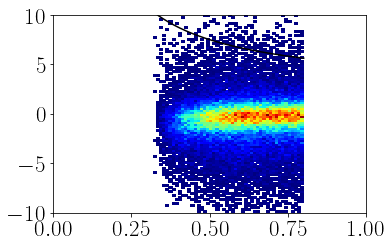

In [722]:
plt.hist2d(pi0ExpInb.Pp, pi0ExpInb.Pvz - pi0ExpInb.Evz, bins = [np.linspace(0, 1, 101), np.linspace(-10, 10, 101)], cmap = cmap, cmin = 1)
# plt.hist2d(dvcsSimInb.Pp, dvcsSimInb.Pvz - dvcsSimInb.Evz, bins = [np.linspace(0, 1, 101), np.linspace(-10, 10, 101)], cmap = cmap, cmin = 1)
x = np.linspace(0.01, 0.8, 10001)
plt.plot(x, 2.5+2.5/x, color = 'k')
# plt.hist(dvcsSimInb.Pvz - dvcsSimInb.Evz, bins = np.linspace(-5, 5, 101), density = True, histtype = 'step')
plt.show()

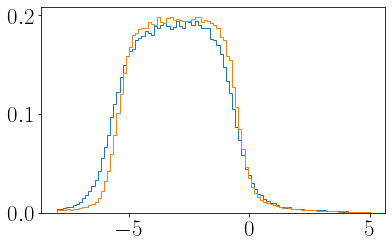

In [168]:
plt.hist(epgExpInb.Evz, bins = np.linspace(-8, 5, 101), density = True, histtype = 'step')
plt.hist(dvcsSimInb.Evz, bins = np.linspace(-8, 5, 101), density = True, histtype = 'step')
plt.show()

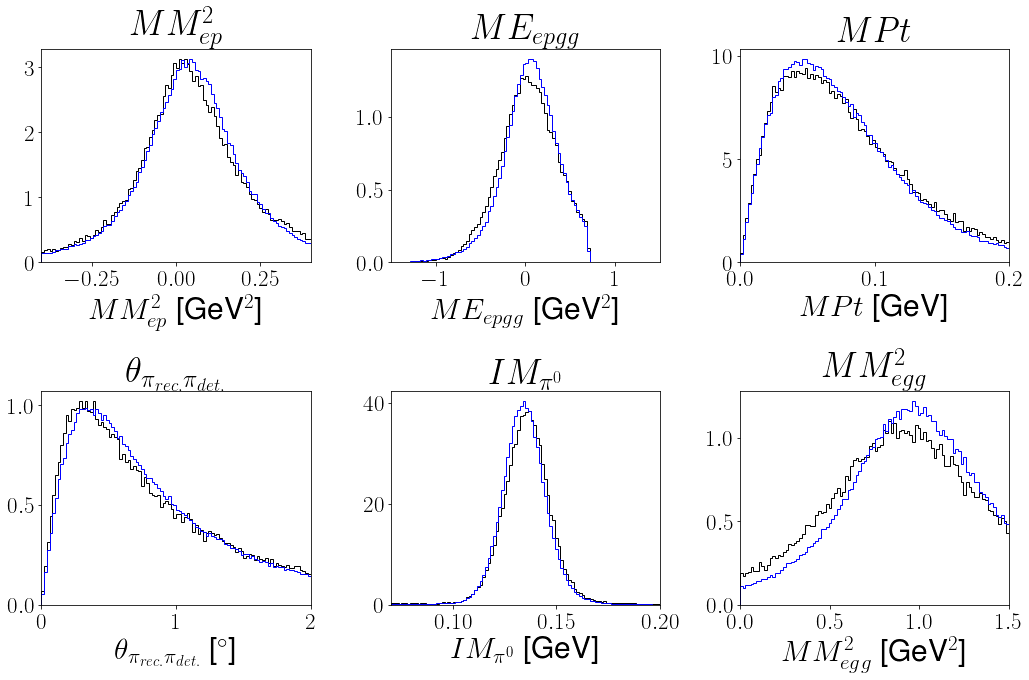

In [801]:
varstoplot = ["MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [-0.4, -1.5, 0, 0, 0.07, 0]
binends = [0.4, 1.5, 0.2, 2, 0.2, 1.5]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

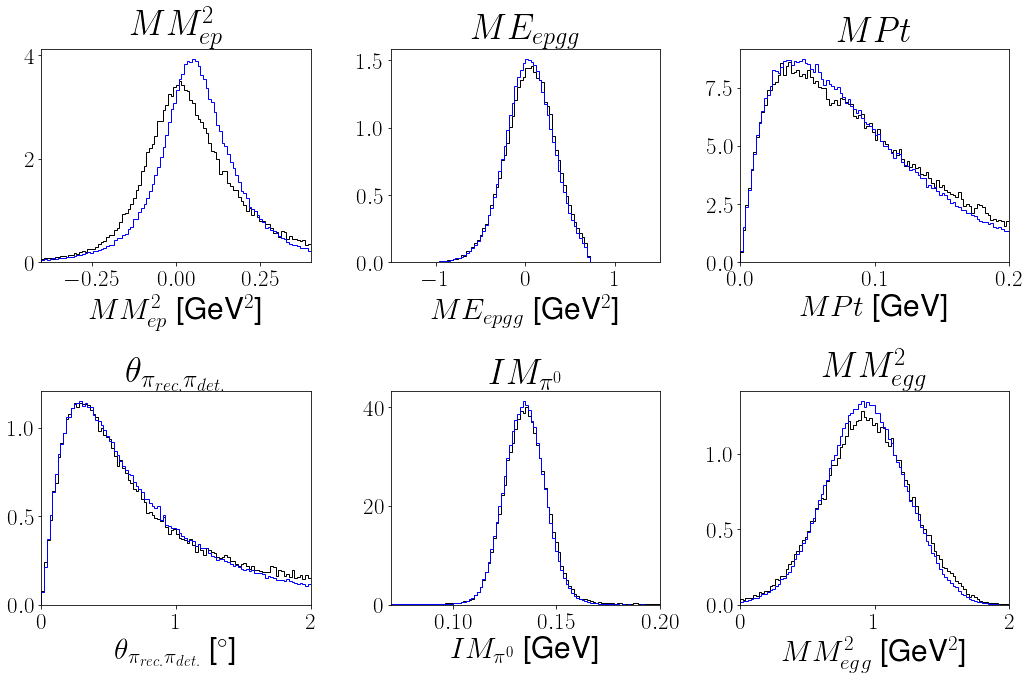

In [802]:
varstoplot = ["MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [-0.4, -1.5, 0, 0, 0.07, 0]
binends = [0.4, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

<AxesSubplot:>

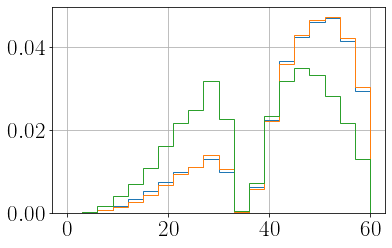

In [443]:
epgExpInb.loc[(epgExpInb.config == 1) |(epgExpInb.config==2)].Ptheta.hist(bins = np.linspace(0,60, 21), density =True, histtype = 'step')
dvcsSimInb.loc[(dvcsSimInb.config == 1) |(dvcsSimInb.config==2)].Ptheta.hist(bins = np.linspace(0,60, 21), density =True, histtype = 'step')
bkgSimInb.loc[(bkgSimInb.config == 1) |(bkgSimInb.config==2)].Ptheta.hist(bins = np.linspace(0,60, 21), density =True, histtype = 'step')

<AxesSubplot:>

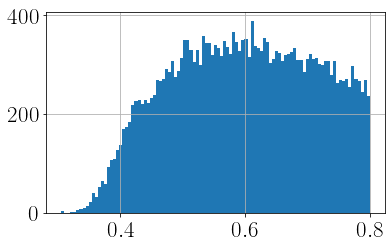

In [345]:
pi0ExpInbCD.Pp.hist(bins = 101)

In [341]:
epgExpInbCD.Pp.min()

0.27990373145892095

<AxesSubplot:>

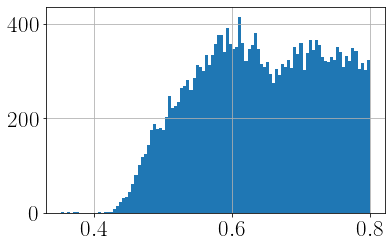

In [344]:
epgExpInbFD.Pp.hist(bins = 101)

<AxesSubplot:>

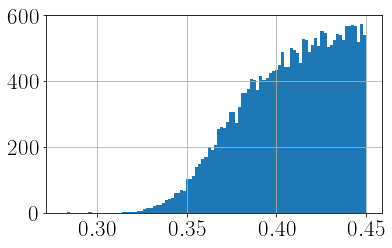

In [349]:
epgExpInbCD.Pp.hist(bins = np.linspace(0.28, 0.45, 101))

<AxesSubplot:>

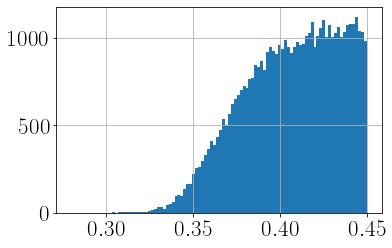

In [350]:
dvcsSimInbCD.Pp.hist(bins = np.linspace(0.28, 0.45, 101))

In [ ]:
plt.hist2d(dvcsSimInb.xB, dvcsSimInb.phi2, bins = [np.linspace(0,1,101), 101], cmap = cmap, cmin =1)
plt.show()

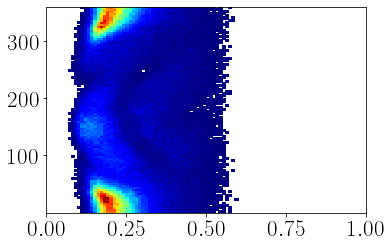

In [625]:
plt.hist2d(epgExpInb.xB, epgExpInb.phi2, bins = [np.linspace(0,1,101), 101], cmap = cmap, cmin =1)
plt.show()

In [812]:
len(pi0ExpInbCD)/len(pi0ExpInbCDFT)

9.02203078661206

In [813]:
len(pi0SimInbCD)/len(pi0SimInbCDFT)

7.351249467988083

In [814]:
(1-contCD)*len(epgExpInbCD)/len(epgExpInbCDFT)

0.9380808298961066

In [815]:
len(dvcsSimInbCD)/len(dvcsSimInbCDFT)

1.1684542986738287

In [816]:
len(pi0ExpInbFD)/len(pi0ExpInbCD)

0.9980590122877044

In [817]:
len(pi0SimInbFD)/len(pi0SimInbCD)

1.00103799646006

In [818]:
(1-contFD)*len(epgExpInbFD)/len(epgExpInbCD)/(1-contCD)

0.16832211205597725

In [819]:
len(dvcsSimInbFD)/len(dvcsSimInbCD)

0.22048980195822132

<AxesSubplot:>

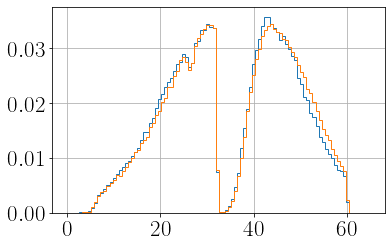

In [807]:
pi0ExpInb.Ptheta.hist(bins = np.linspace(0, 65, 101), histtype = 'step', density = True)
pi0SimInb.Ptheta.hist(bins = np.linspace(0, 65, 101), histtype = 'step', density = True)

In [604]:
epgExpInbCD.loc[epgExpInbCD.Ptheta<55]

,Epx,Epy,Epz,Evz,Esector,event,Ppx,Ppy,Ppz,Pvz,...,reconGam,coplanarity,ycol1,ycol2,ymax1,ymax2,tmin1,tmin2,tcol,config
43,0.801120,-1.008568,5.148203,-1.729418,6,25,-0.400380,0.221324,0.416983,-1.238200,...,0.260729,3.641896,0.926898,0.929534,0.971690,0.970017,0.141974,0.134533,2.026981,2
64,0.515365,1.005017,4.418859,-2.711517,2,38,-0.111447,-0.318119,0.250912,-1.427937,...,0.298480,1.961415,0.944916,0.945992,0.980184,0.979375,0.080721,0.076530,1.527044,2
101,-0.676543,-0.308584,2.773739,1.022546,4,60,-0.157417,0.309123,0.262358,-4.282434,...,0.284029,3.607998,0.918937,0.920020,0.991462,0.991314,0.020668,0.019663,0.628092,2
179,-0.972946,-0.311638,3.306221,-4.657834,4,111,-0.353942,-0.075390,0.441886,-5.864381,...,0.310739,2.785788,0.917527,0.919666,0.984468,0.983974,0.066877,0.063806,1.277558,2
355,0.668318,-0.653944,3.328262,-2.168264,6,225,-0.237677,-0.223565,0.291999,-2.768717,...,0.124834,2.211479,0.947967,0.948650,0.986971,0.986625,0.044564,0.042405,1.032712,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662984,-1.327773,0.078808,4.135933,-2.063899,4,2397071,0.433775,-0.041657,0.490929,-2.136436,...,0.176797,2.705364,0.947489,0.949104,0.973259,0.971769,0.186789,0.178874,2.330997,2
3662999,0.762596,0.190398,2.502738,-8.223045,1,2397082,0.345093,-0.198593,0.361751,-5.348896,...,0.497084,5.903992,0.897181,0.899311,0.990164,0.989967,0.030256,0.028876,0.725525,2
3663012,0.856387,0.406725,3.229446,-3.271154,1,2397092,-0.440965,0.330365,0.396981,-2.121151,...,0.088085,0.200421,0.885350,0.888796,0.986576,0.986208,0.049109,0.046786,1.073295,2
3663124,-0.299426,-0.689096,4.148107,-0.063033,5,2397161,-0.310229,-0.409930,0.412516,-1.500100,...,0.323548,0.901228,0.782294,0.788537,0.991382,0.991231,0.013993,0.013156,0.613174,2


In [669]:
len(pi0ExpInbCD.loc[pi0ExpInbCD.Gsector2<7])/len(pi0ExpInbCD)

0.9295319748664044

In [668]:
len(pi0SimInbCD.loc[pi0SimInbCD.Gsector2<7])/len(pi0SimInbCD)

0.9704082298957016

In [262]:
len(pi0ExpInbCDFT.loc[pi0ExpInbCDFT.Gsector2<7])

0

In [663]:
np.sqrt(_662/_661)

1.5383755267402688

In [821]:
pi0 = [bkgSimInbFD.Mpx + bkgSimInbFD.Gpx, bkgSimInbFD.Mpy + bkgSimInbFD.Gpy, bkgSimInbFD.Mpz + bkgSimInbFD.Gpz]
pi0E = bkgSimInbFD.ME_epg + bkgSimInbFD.Ge

In [822]:
pi0_2 = [dvcsSimInbFD.Mpx + dvcsSimInbFD.Gpx, dvcsSimInbFD.Mpy + dvcsSimInbFD.Gpy, dvcsSimInbFD.Mpz + dvcsSimInbFD.Gpz]
pi0E_2 = dvcsSimInbFD.ME_epg + dvcsSimInbFD.Ge

In [823]:
pi0_3 = [epgExpInbFD.Mpx + epgExpInbFD.Gpx, epgExpInbFD.Mpy + epgExpInbFD.Gpy, epgExpInbFD.Mpz + epgExpInbFD.Gpz]
pi0E_3 = epgExpInbFD.ME_epg + epgExpInbFD.Ge

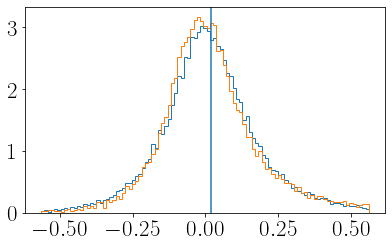

In [824]:
# plt.hist(pi0E**2 - mag(pi0)**2, bins = 101, histtype = 'step', density = True)
plt.hist(pi0E_2**2 - mag(pi0_2)**2, bins = 101, histtype = 'step', density = True)
plt.hist(pi0E_3**2 - mag(pi0_3)**2, bins = 101, histtype = 'step', density = True)
plt.axvline(0.135**2)
plt.show()